In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Load data

In [10]:
# Load a file
dd_op = dict()
dd_lat = dict()
dd_ReM = dict()
maxi = 30
#turns = np.linspace(1, maxi, maxi)
turns = range(0,maxi)
print turns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [11]:
for t in turns:
    if t <= 9:    inputs = 'bunch_output/mainbunch_00000' + str(int(t)) + '.mat'
    else:    inputs = 'bunch_output/mainbunch_0000' + str(int(t)) + '.mat'
    print inputs
    dd_op = add_input_file(dd_op, inputs, t+1)
    
    
dd_op = add_input_file(dd_op, 'bunch_output/mainbunch_-000001.mat', 0)

bunch_output/mainbunch_000000.mat
	Added output data from  bunch_output/mainbunch_000000.mat 	 dictionary key:  1
bunch_output/mainbunch_000001.mat
	Added output data from  bunch_output/mainbunch_000001.mat 	 dictionary key:  2
bunch_output/mainbunch_000002.mat
	Added output data from  bunch_output/mainbunch_000002.mat 	 dictionary key:  3
bunch_output/mainbunch_000003.mat
	Added output data from  bunch_output/mainbunch_000003.mat 	 dictionary key:  4
bunch_output/mainbunch_000004.mat
	Added output data from  bunch_output/mainbunch_000004.mat 	 dictionary key:  5
bunch_output/mainbunch_000005.mat
	Added output data from  bunch_output/mainbunch_000005.mat 	 dictionary key:  6
bunch_output/mainbunch_000006.mat
	Added output data from  bunch_output/mainbunch_000006.mat 	 dictionary key:  7
bunch_output/mainbunch_000007.mat
	Added output data from  bunch_output/mainbunch_000007.mat 	 dictionary key:  8
bunch_output/mainbunch_000008.mat
	Added output data from  bunch_output/mainbunch_000008

In [12]:
main_label = 'PS_Transfer_Test'
sc = 'noSC'
legend_label = 'Turn'

In [13]:
# access all particle x co-ordinates like this
dd_op[0]['particles']['dE'][0][0][0]

array([-0.00391979, -0.0037238 , -0.00352781, -0.00333182, -0.00313583,
       -0.00293984, -0.00274385, -0.00254786, -0.00235188, -0.00215589,
       -0.0019599 , -0.00176391, -0.00156792, -0.00137193, -0.00117594,
       -0.00097995, -0.00078396, -0.00058797, -0.00039198, -0.00019599,
        0.        ,  0.00019599,  0.00039198,  0.00058797,  0.00078396,
        0.00097995,  0.00117594,  0.00137193,  0.00156792,  0.00176391,
        0.0019599 ,  0.00215589,  0.00235188,  0.00254786,  0.00274385,
        0.00293984,  0.00313583,  0.00333182,  0.00352781,  0.0037238 ,
        0.00391979])

# From Matt

In [14]:
# Plot initial distns to check

Beta = 0.915839281848
E = 2336654575.29 * 1E-9 

# From Matt
# Operational
DX0_op = 2.6327274483633305
DPX0_op = -0.11044344187800001

# ReMatched
DX0_ReM = 2.683
DPX0_ReM = -0.022

#Lattice
DX0_lat = 2.35
DPX0_lat = -0.007439089545

DELTAP = np.arange(-2.,2.1,0.1)*1e-3

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

DE = (DELTAP) * Beta * Beta * E

X0_lat = DELTAP*DX0_lat + closed_orbit_x
PX0_lat = DELTAP*DPX0_lat + closed_orbit_xp

X0_op = DELTAP*DX0_op + closed_orbit_x
PX0_op = DELTAP*DPX0_op + closed_orbit_xp

X0_ReM = DELTAP*DX0_ReM + closed_orbit_x
PX0_ReM = DELTAP*DPX0_ReM + closed_orbit_xp


Z0 = np.zeros(np.shape(X0_lat))
Y0 = np.zeros(np.shape(X0_lat))
PY0 = np.zeros(np.shape(X0_lat))

## Plot initial distns to check

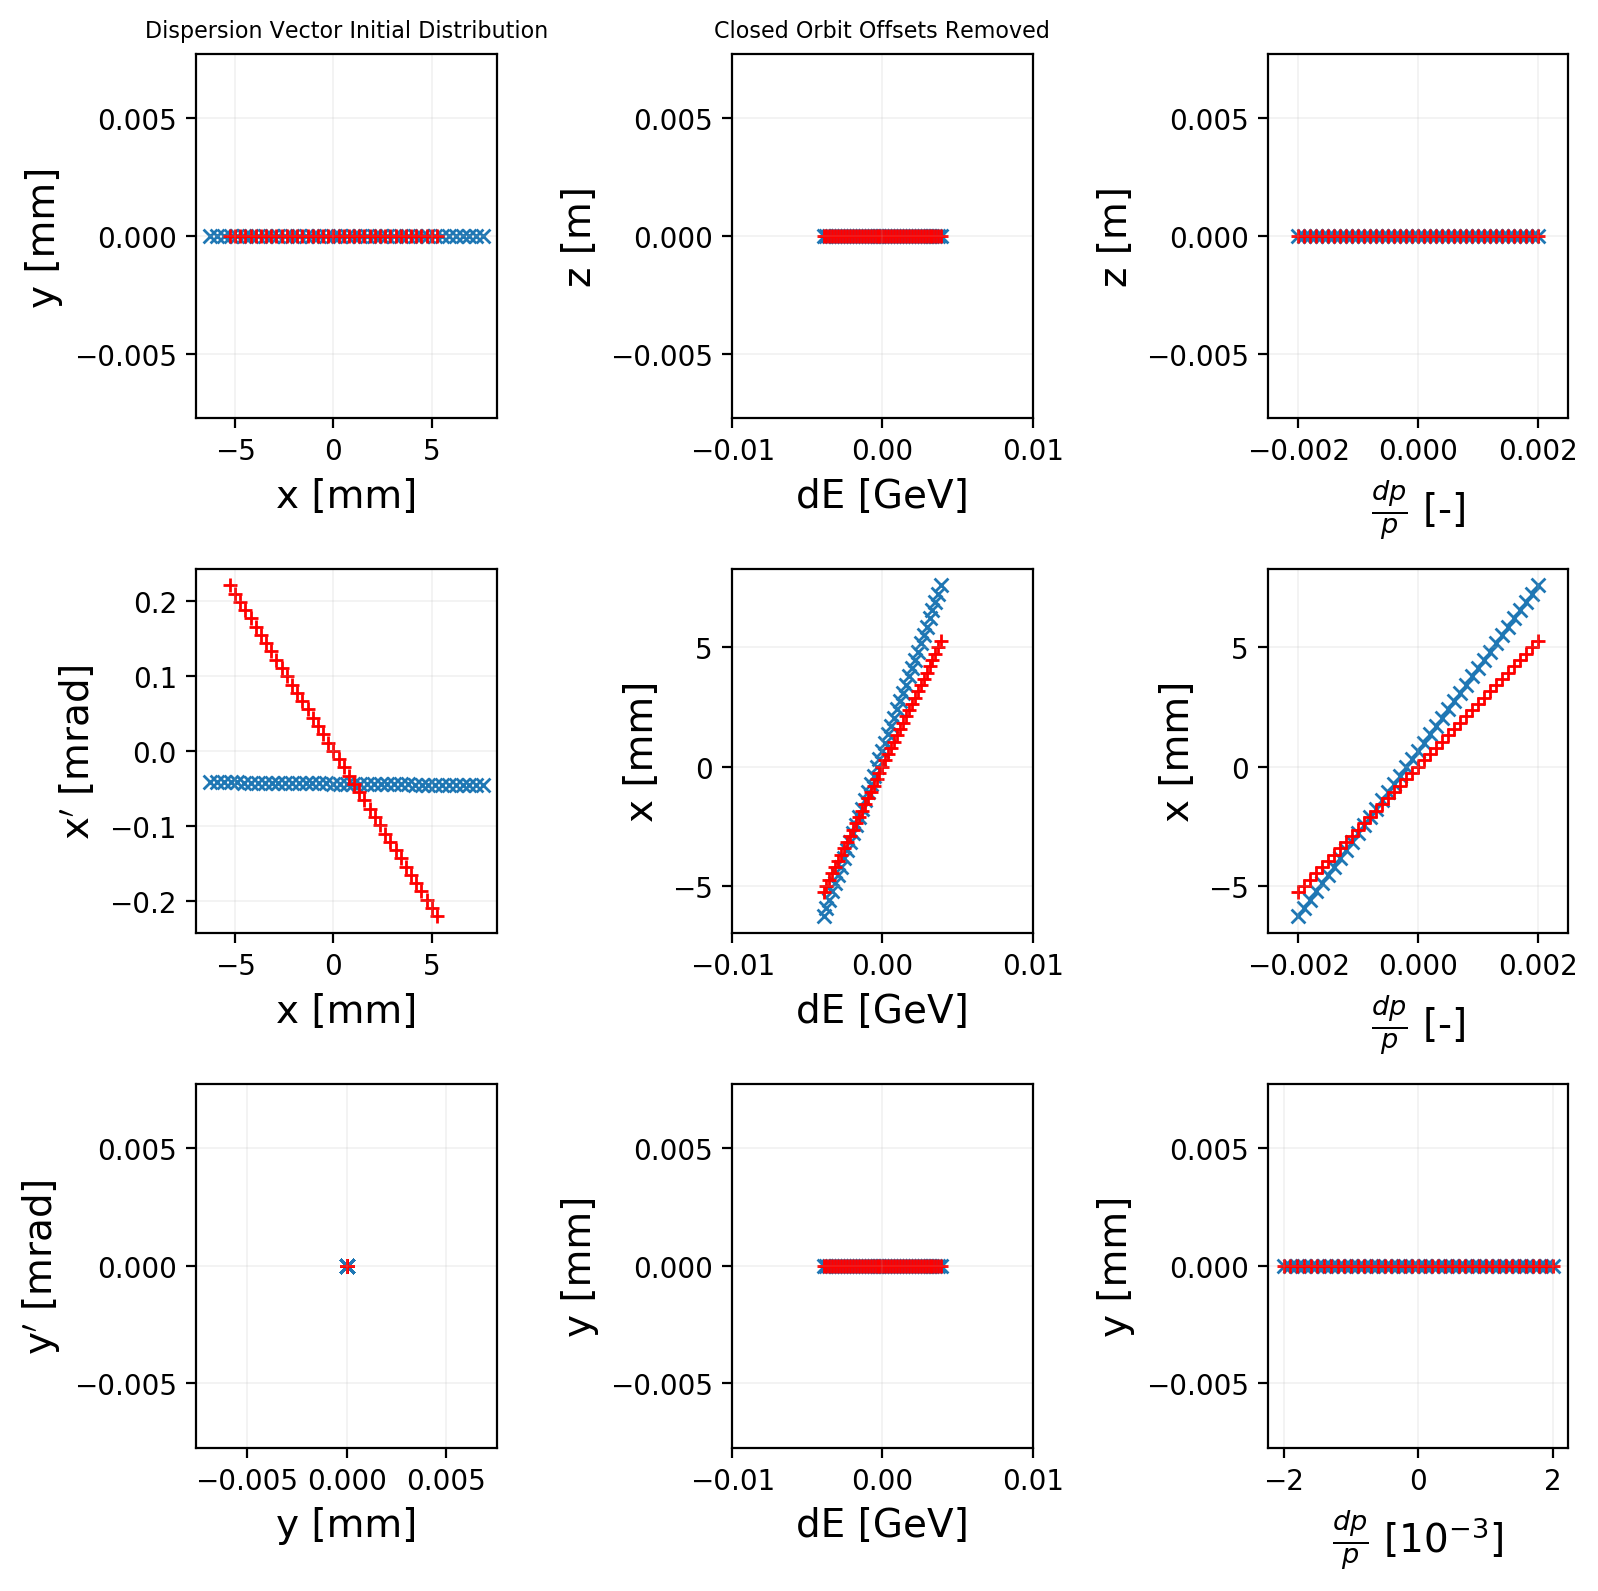

In [16]:
#plt.rcParams['axes.titlesize'] = 20
#plt.rcParams['axes.labelsize'] = 16

#plt.rcParams['xtick.labelsize'] = 10
#plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5


closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

Beta = 0.915839281848
E = 2336654575.29 * 1E-9 

fig1, ax1 = plt.subplots(3, 3)

ax1[0, 0].set_title('Dispersion Vector Initial Distribution', fontsize=8);
ax1[0, 1].set_title('Closed Orbit Offsets Removed', fontsize=8);

ax1[0, 0].scatter((dd_op[0]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, dd_op[0]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[0, 0].scatter((X0_op-closed_orbit_x)*1E3, Y0*1E3, marker='+', color='r');
ax1[0, 0].grid(linewidth=0.1);
ax1[0, 0].set_xlabel('x [mm]');
ax1[0, 0].set_ylabel('y [mm]');

ax1[0, 1].scatter(dd_op[0]['particles']['dE'][0][0][0], dd_op[0]['particles']['z'][0][0][0], marker='x');
ax1[0, 1].scatter(DE, Z0, marker='+', color='r');
ax1[0, 1].grid(linewidth=0.1);
ax1[0, 1].set_ylabel('z [m]');
ax1[0, 1].set_xlabel('dE [GeV]');
ax1[0, 1].set_xlim(-1E-2, 1E-2);

ax1[0, 2].scatter( ((dd_op[0]['particles']['dE'][0][0][0])/E/Beta**2) , dd_op[0]['particles']['z'][0][0][0], marker='x');
ax1[0, 2].scatter(DELTAP, Z0, marker='+', color='r');
ax1[0, 2].grid(linewidth=0.1);
ax1[0, 2].set_ylabel('z [m]');
ax1[0, 2].set_xlabel(r'$\frac{dp}{p}$ [-]');
ax1[0, 2].set_xlim(-2.5E-3, 2.5E-3);

ax1[1, 0].scatter((dd_op[0]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, (dd_op[0]['particles']['xp'][0][0][0]-closed_orbit_xp)*1E3, marker='x');
ax1[1, 0].scatter((X0_op-closed_orbit_x)*1E3, (PX0_op-closed_orbit_xp)*1E3, marker='+', color='r');
ax1[1, 0].grid(linewidth=0.1);
ax1[1, 0].set_xlabel('x [mm]');
ax1[1, 0].set_ylabel(r'x$^{\prime}$ [mrad]');

ax1[1, 1].scatter(dd_op[0]['particles']['dE'][0][0][0], (dd_op[0]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, marker='x');
ax1[1, 1].scatter(DE, (X0_op-closed_orbit_x)*1E3, marker='+', color='r');
ax1[1, 1].grid(linewidth=0.1);
ax1[1, 1].set_xlabel('dE [GeV]');
ax1[1, 1].set_ylabel('x [mm]');
ax1[1, 1].set_xlim(-1E-2, 1E-2);

ax1[1, 2].scatter(((dd_op[0]['particles']['dE'][0][0][0])/E/Beta**2), (dd_op[0]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, marker='x');
ax1[1, 2].scatter(DELTAP, (X0_op-closed_orbit_x)*1E3, marker='+', color='r');
ax1[1, 2].grid(linewidth=0.1);
ax1[1, 2].set_xlabel(r'$\frac{dp}{p}$ [-]');
ax1[1, 2].set_ylabel('x [mm]');
ax1[1, 2].set_xlim(-2.5E-3, 2.5E-3);

ax1[2, 0].scatter(dd_op[0]['particles']['y'][0][0][0]*1E3, dd_op[0]['particles']['yp'][0][0][0]*1E3, marker='x');
ax1[2, 0].scatter(Y0*1E3, PY0*1E3, marker='+', color='r');
ax1[2, 0].grid(linewidth=0.1);
ax1[2, 0].set_xlabel('y [mm]');
ax1[2, 0].set_ylabel(r'y$^{\prime}$ [mrad]');

ax1[2, 1].scatter(dd_op[0]['particles']['dE'][0][0][0], dd_op[0]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[2, 1].scatter(DE, Y0*1E3, marker='+', color='r');
ax1[2, 1].grid(linewidth=0.1);
ax1[2, 1].set_xlabel('dE [GeV]');
ax1[2, 1].set_ylabel('y [mm]');
ax1[2, 1].set_xlim(-1E-2, 1E-2);

ax1[2, 2].scatter(((dd_op[0]['particles']['dE'][0][0][0])/E/Beta**2)*1E3, dd_op[0]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[2, 2].scatter(DELTAP*1E3, Y0*1E3, marker='+', color='r');
ax1[2, 2].grid(linewidth=0.1);
ax1[2, 2].set_xlabel(r'$\frac{dp}{p}$ [10$^{-3}$]');
ax1[2, 2].set_ylabel('y [mm]');
#ax1[2, 2].set_xlim(-2.5E-3, 2.5E-3);

fig1.tight_layout();

savename = 'Plots/Dispersion_Vector_Initial_Distribution_Op.png'
fig1.savefig(savename, dpi = 100)
#plt.close()

## Plot x - xp phase space

/usr/lib64/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


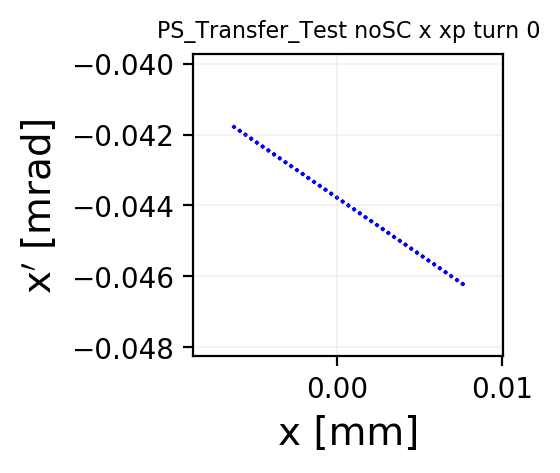

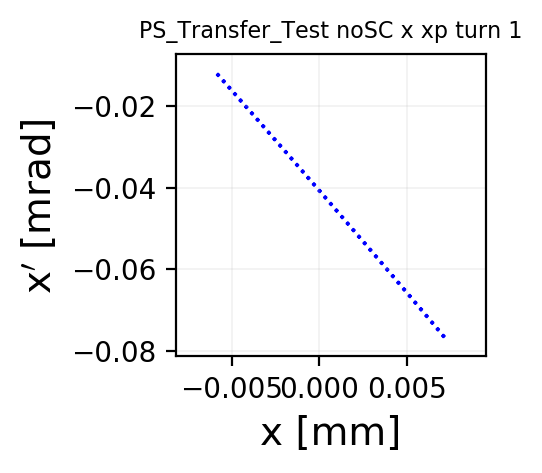

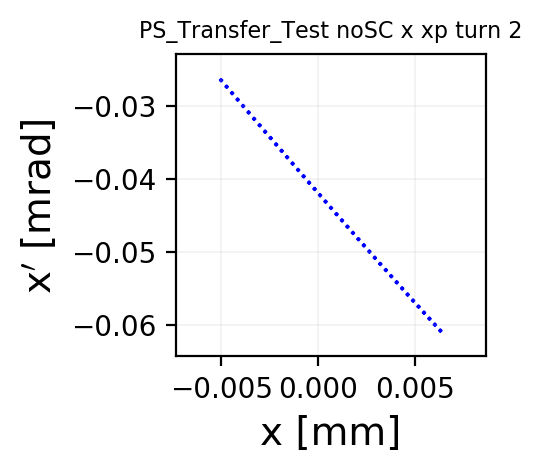

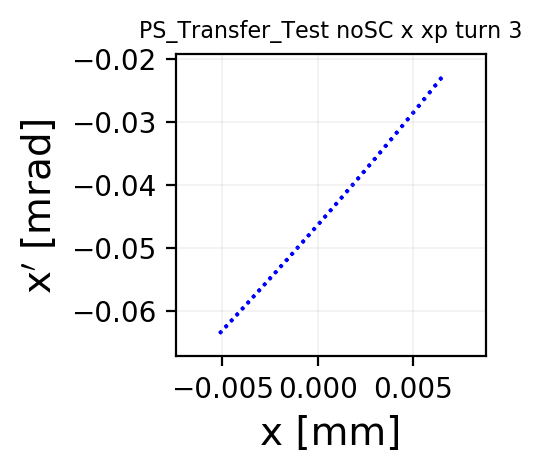

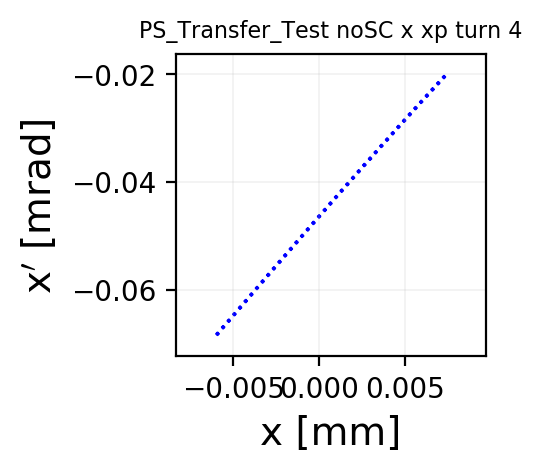

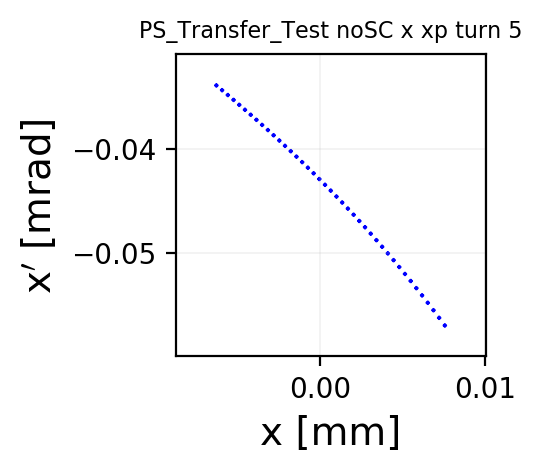

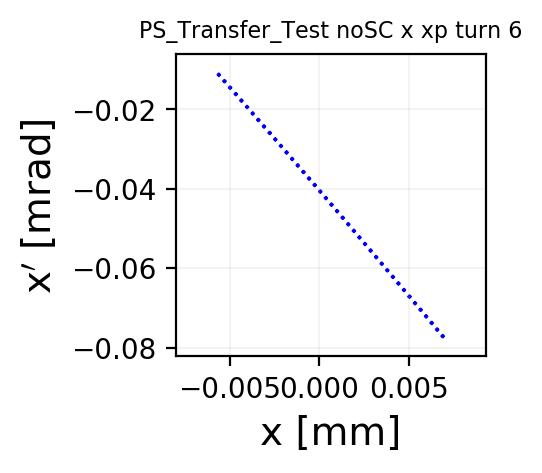

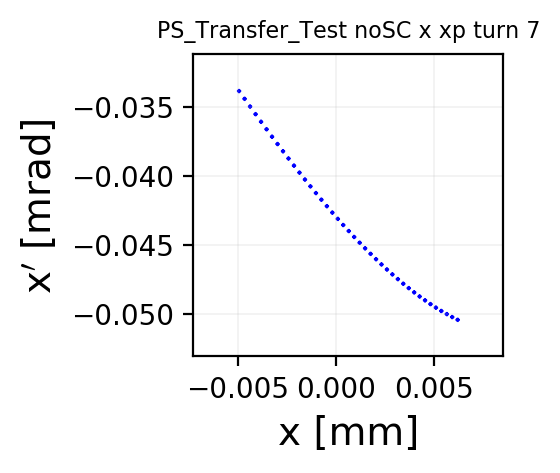

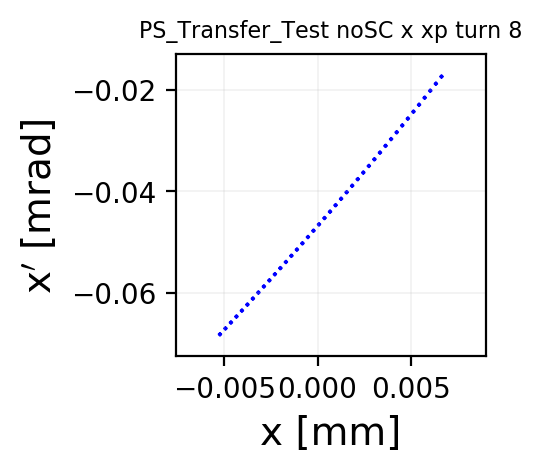

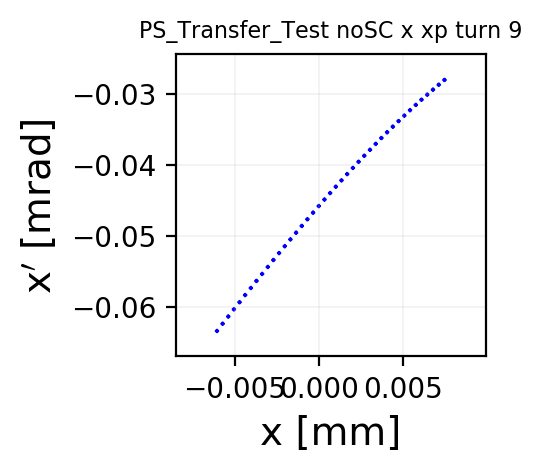

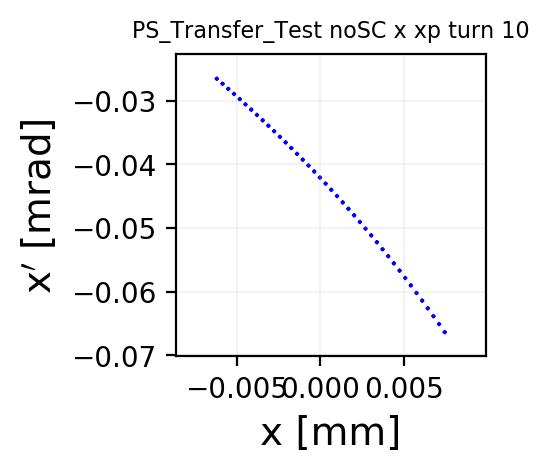

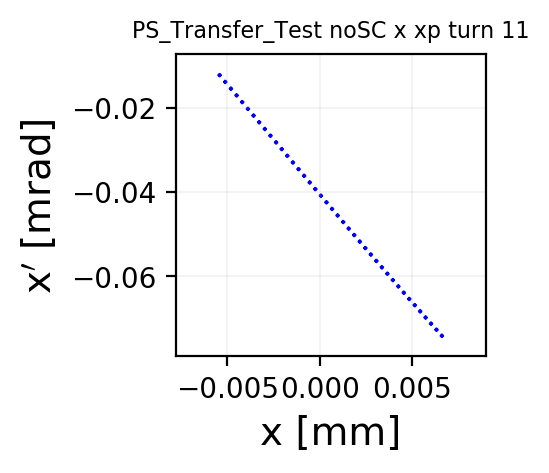

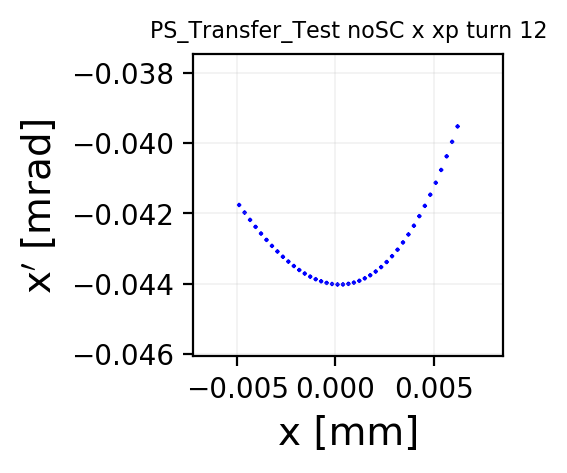

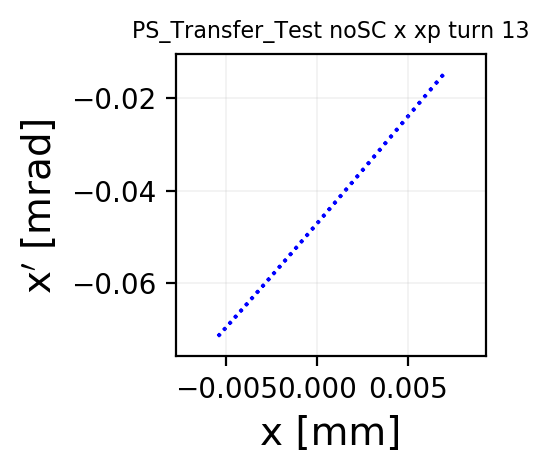

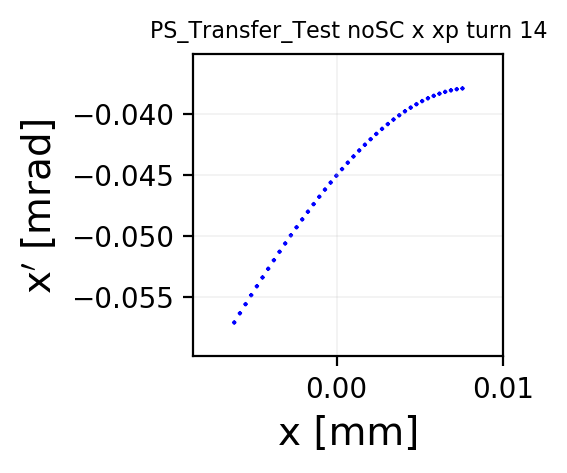

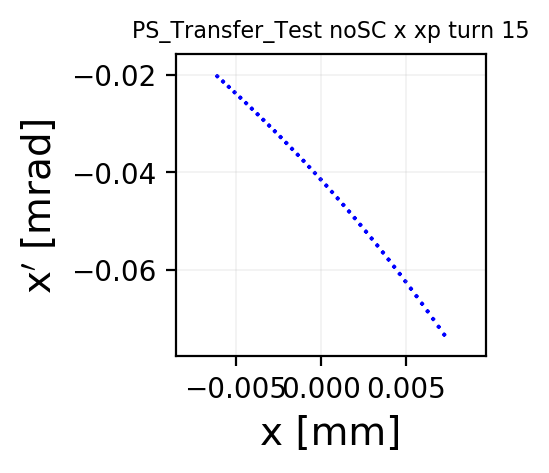

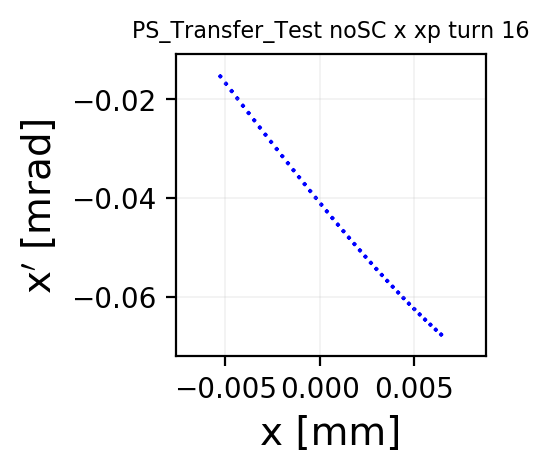

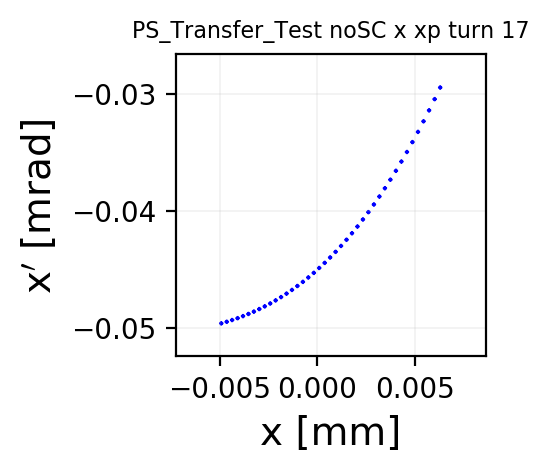

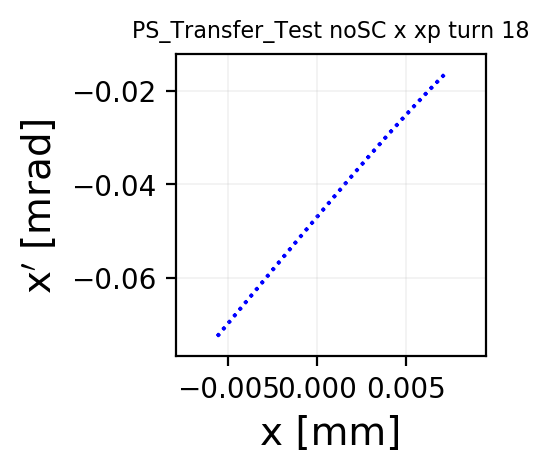

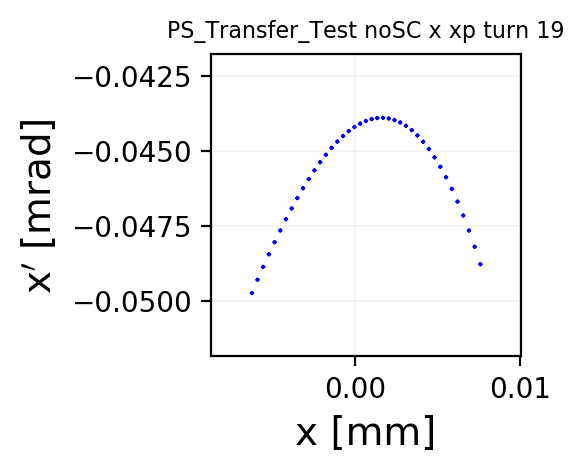

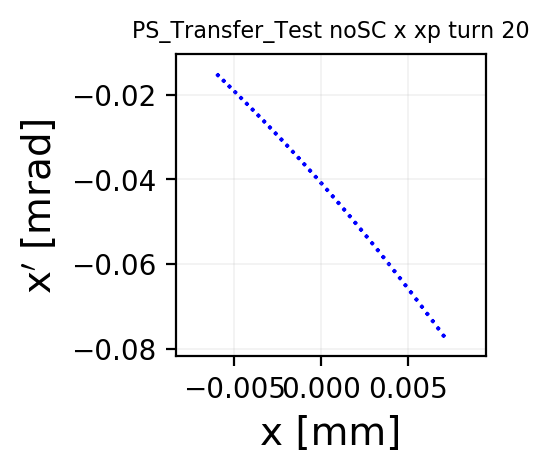

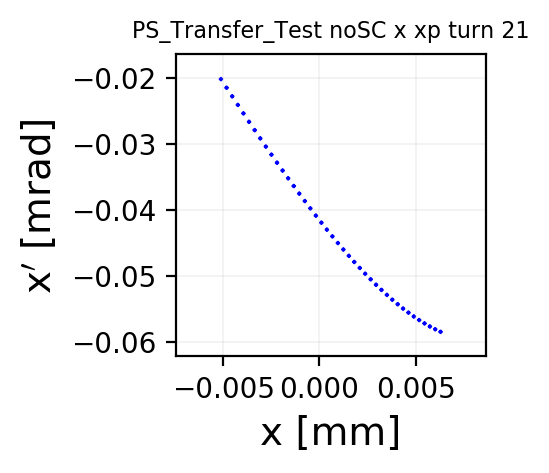

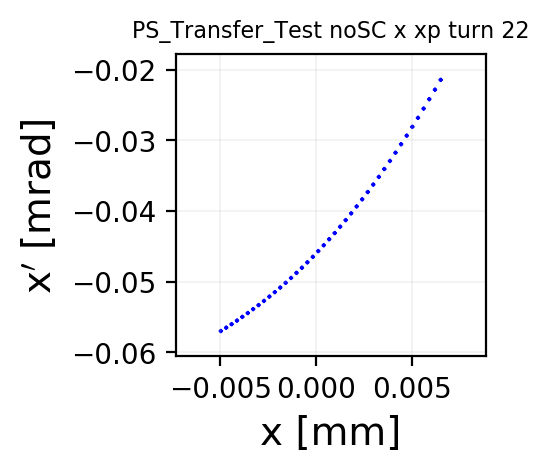

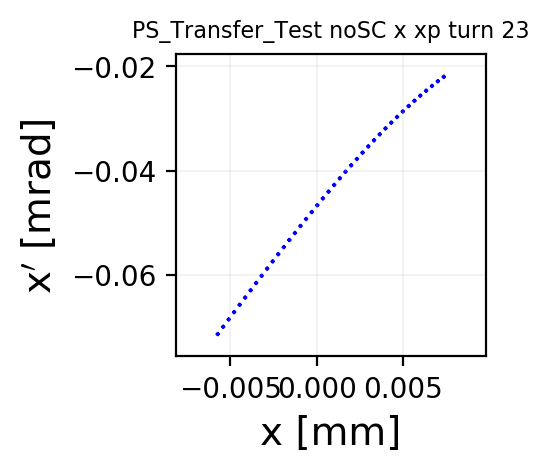

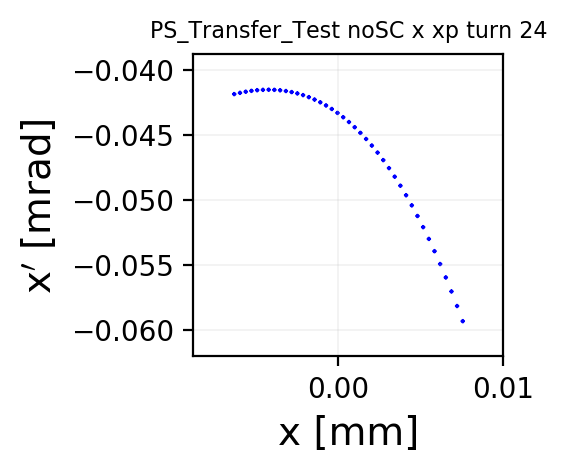

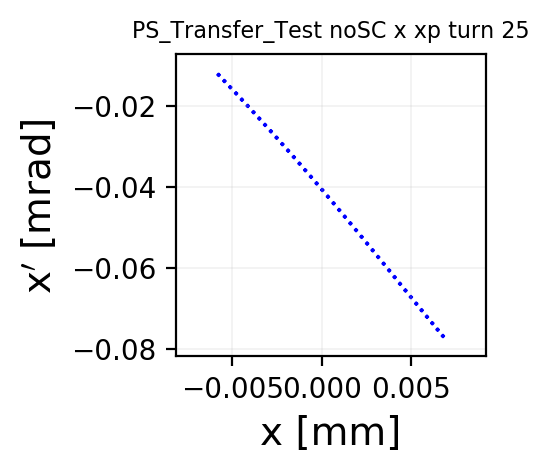

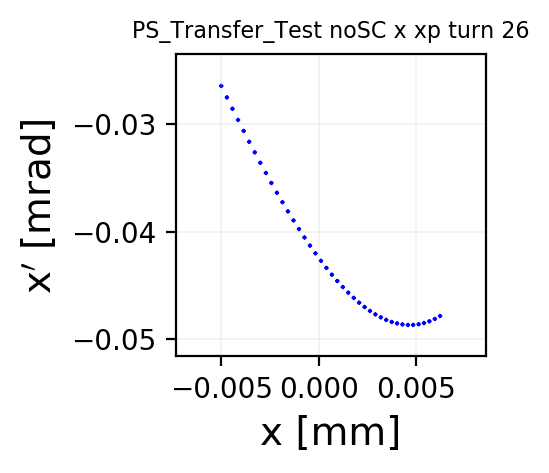

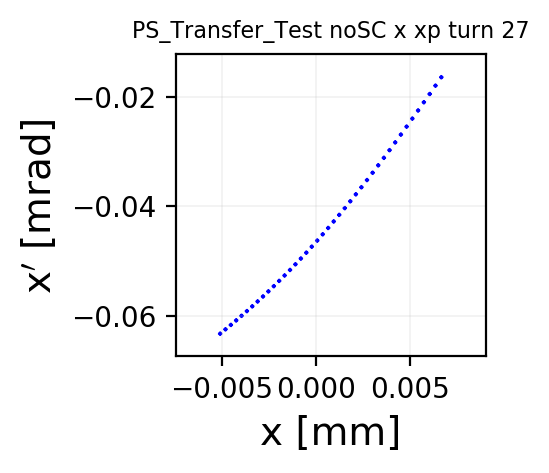

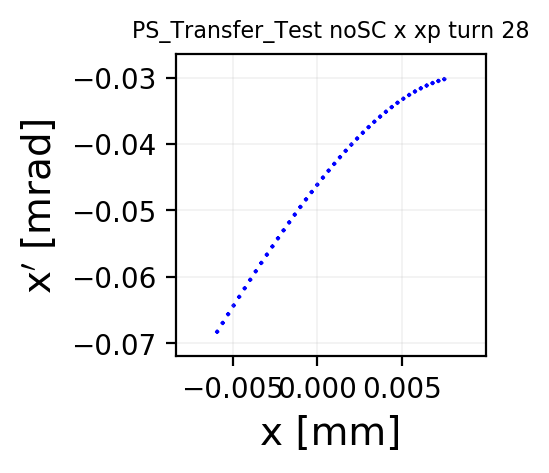

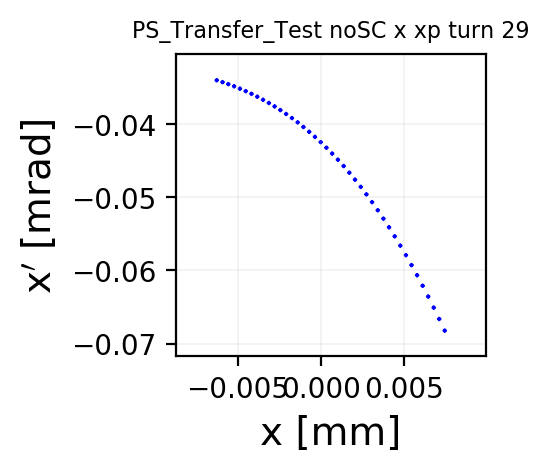

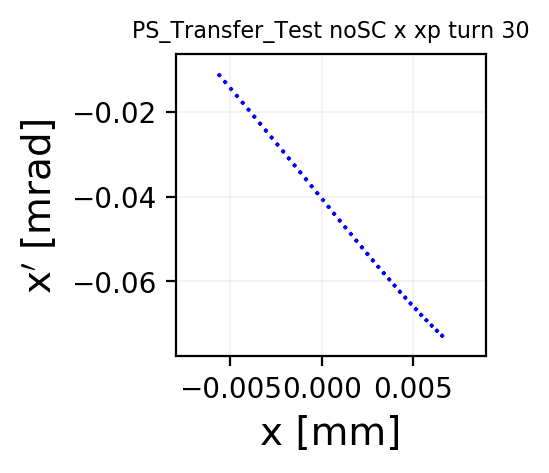

In [20]:
plt.rcParams['figure.figsize'] = [2.0, 2.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.titlesize'] = 8

parameter1 = 'x'
parameter2 = 'xp'
multi1 = 1
multi2 = 1E3

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044


for key, value in sorted(dd_op.iteritems()):
    
    fig1, ax1 = plt.subplots(1)
    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)    
    ax1.set_title(tit);
    ax1.set_xlabel('x [mm]');
    ax1.set_ylabel(r'x$^{\prime}$ [mrad]');

    s = np.ones(len(dd_op[key]['particles'][parameter1][0][0][0]))
    #ax1.scatter((dd_lat[key]['particles'][parameter1][0][0][0]-closed_orbit_x)*multi1, (dd_lat[key]['particles'][parameter2][0][0][0] - closed_orbit_xp)*multi2, color='k', marker='x', s=s);
    ax1.scatter((dd_op[key]['particles'][parameter1][0][0][0]-closed_orbit_x)*multi1, (dd_op[key]['particles'][parameter2][0][0][0] - closed_orbit_xp)*multi2, color='b', marker='x', s=s);
    #ax1.scatter((dd_ReM[key]['particles'][parameter1][0][0][0]-closed_orbit_x)*multi1, (dd_ReM[key]['particles'][parameter2][0][0][0] - closed_orbit_xp)*multi2, color='r', marker='x', s=s);
    

    #ax1.legend(fontsize='x-small', loc=4, title=legend_label)
    ax1.grid(linewidth=0.1)
    #ax1.set_xlim(-2E-3, 2E-3)
    #ax1.set_xlim(-10, 10)
    custom_lines = [Line2D([0], [0], color='k', lw=1),
                    Line2D([0], [0], color='b', lw=1),
                    Line2D([0], [0], color='r', lw=1)]

    #ax1.legend(custom_lines, ['Lattice', 'Operational', 'ReMatched'], fontsize='x-small', loc=1)
    #savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'
    
    #bw_gifnames_x_xp.append(savename)
    
    #fig1.savefig(savename, dpi = 100)
    #plt.close()

## Plot x - dE phase space

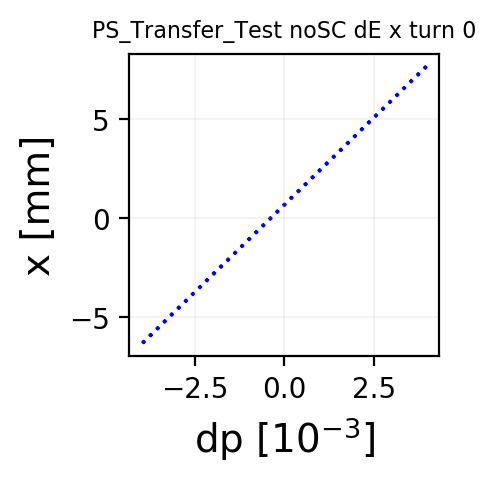

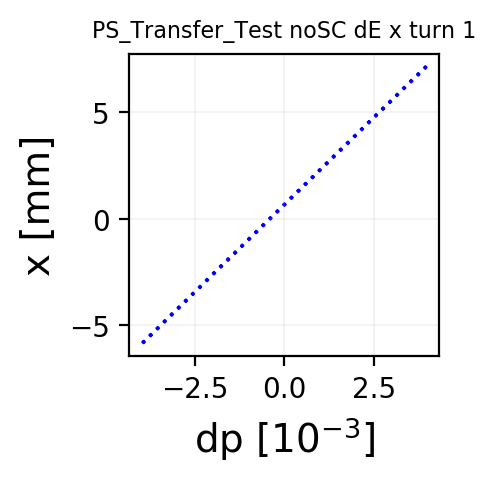

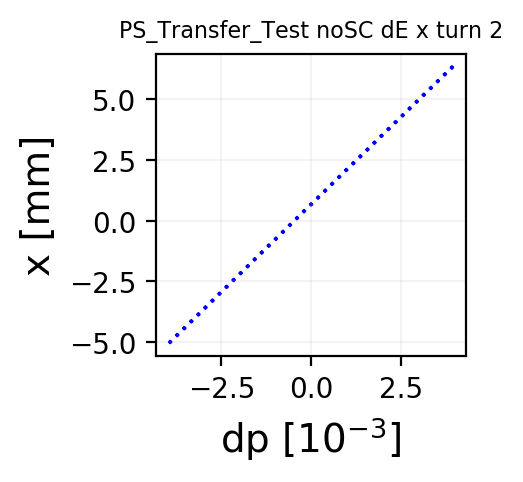

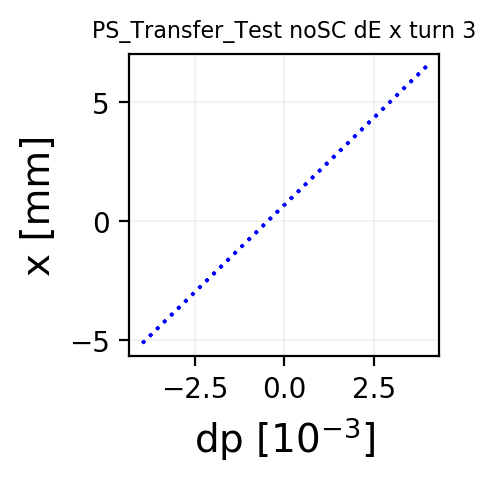

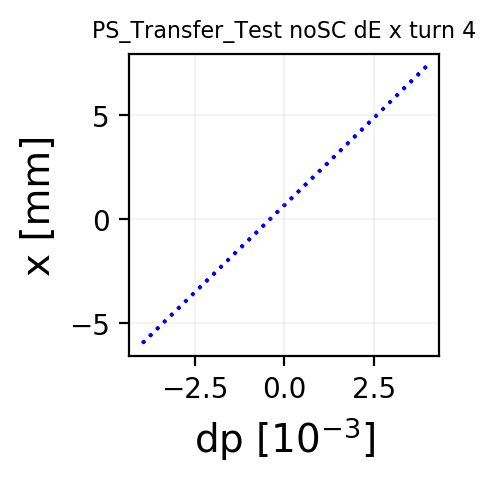

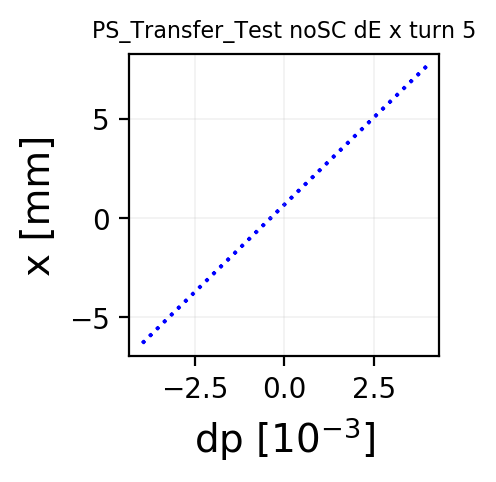

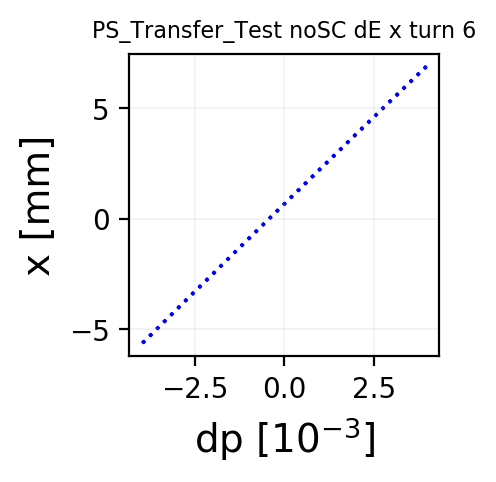

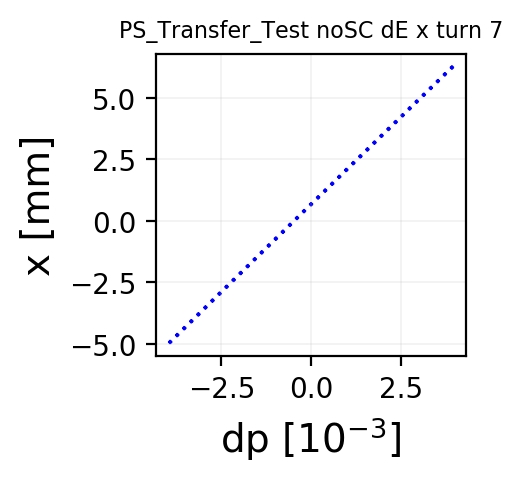

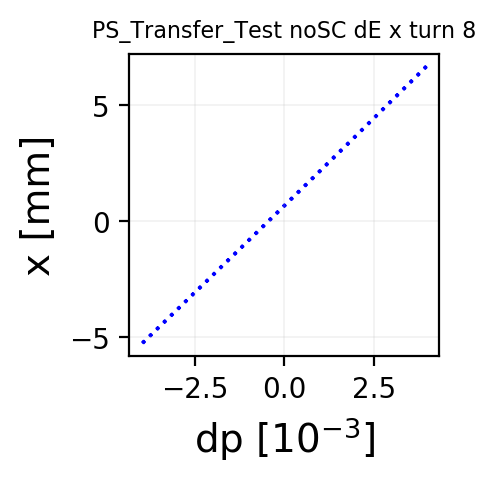

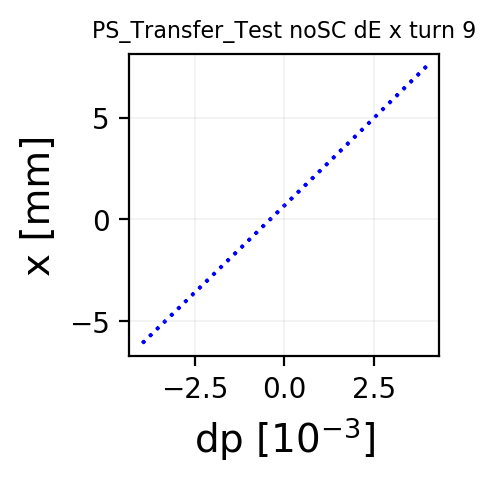

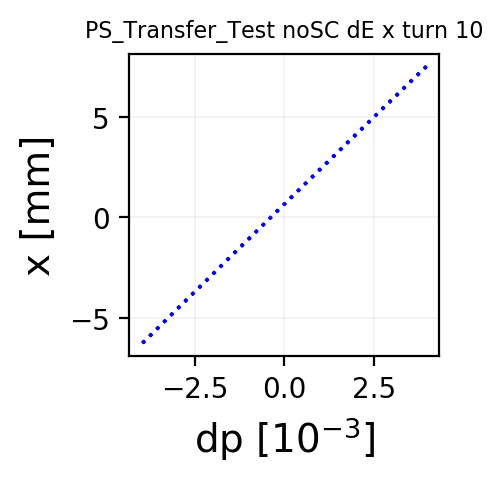

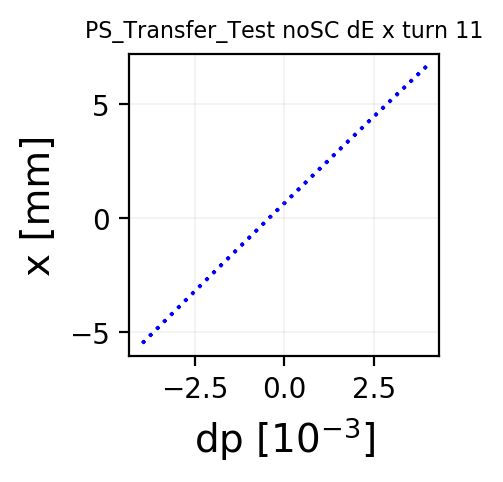

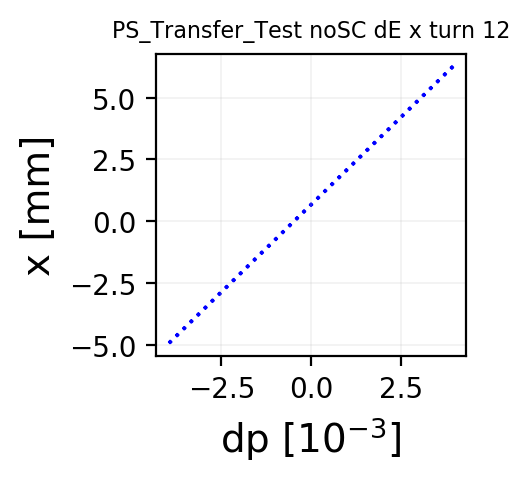

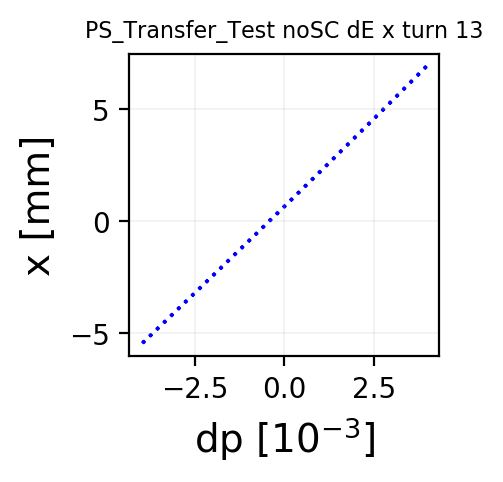

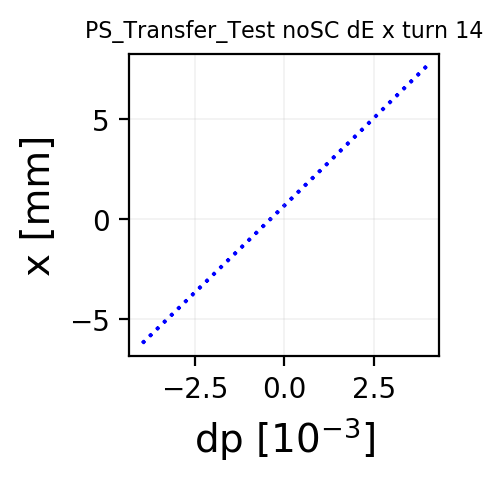

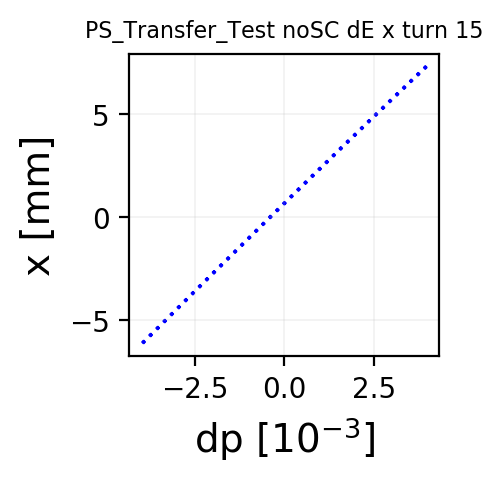

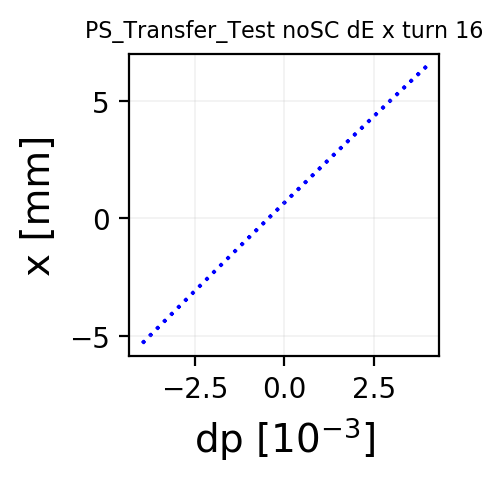

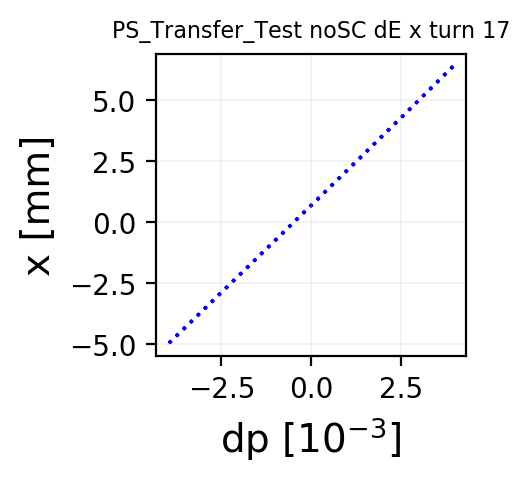

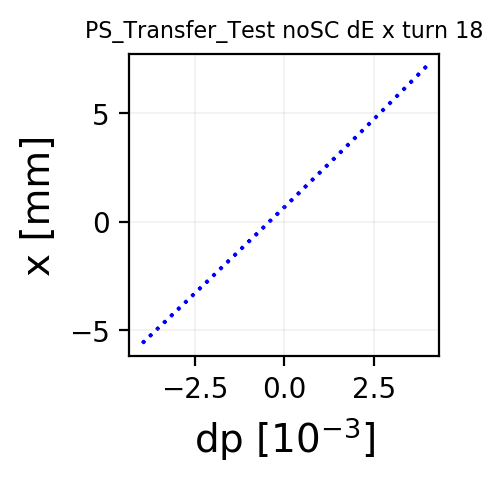

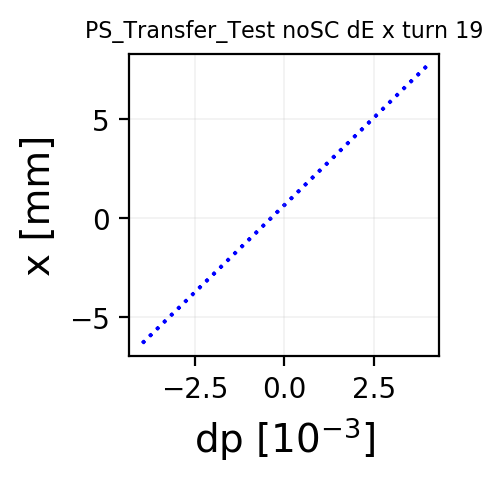

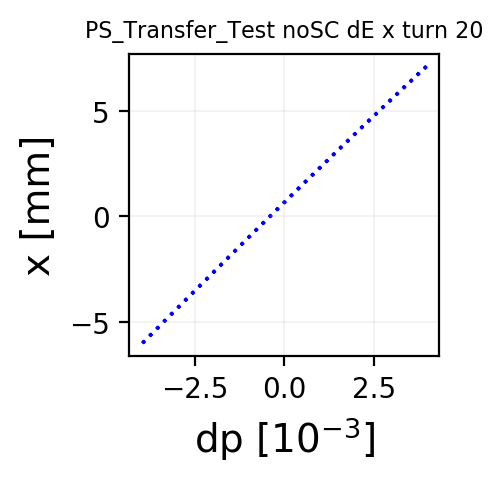

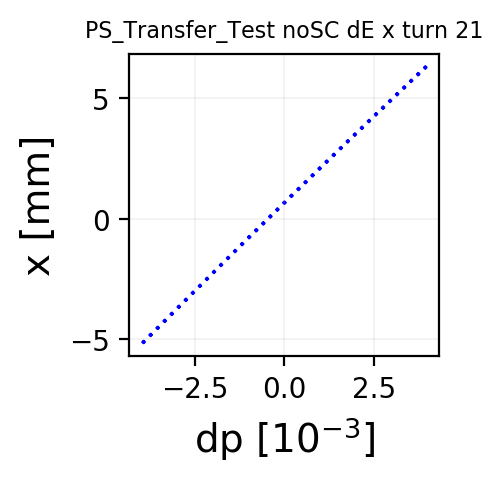

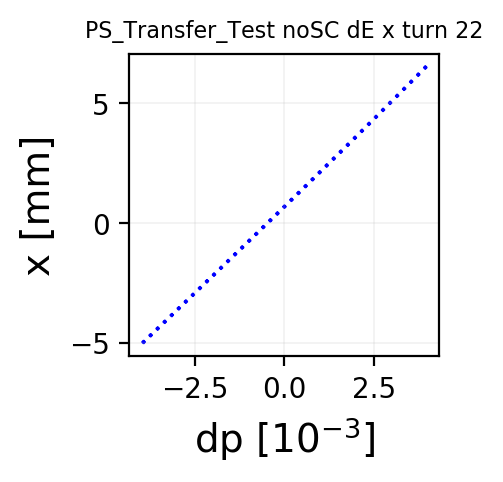

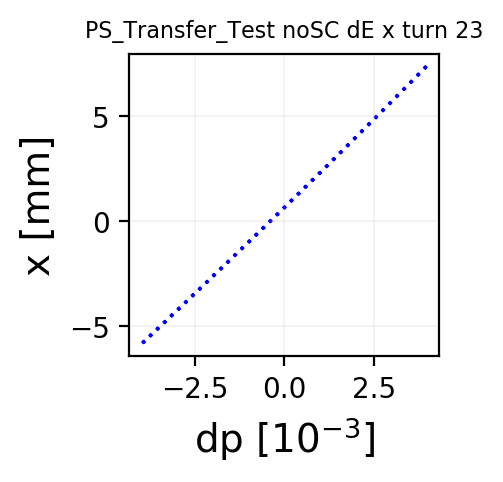

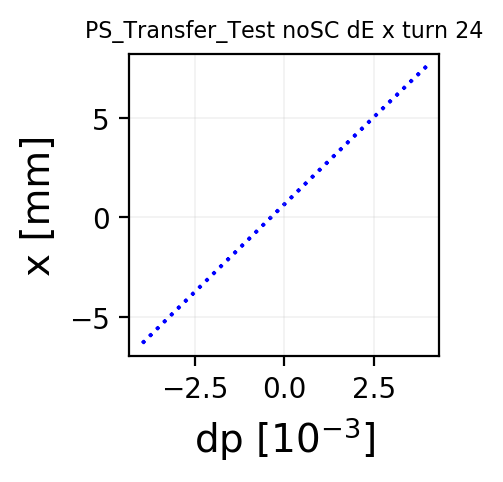

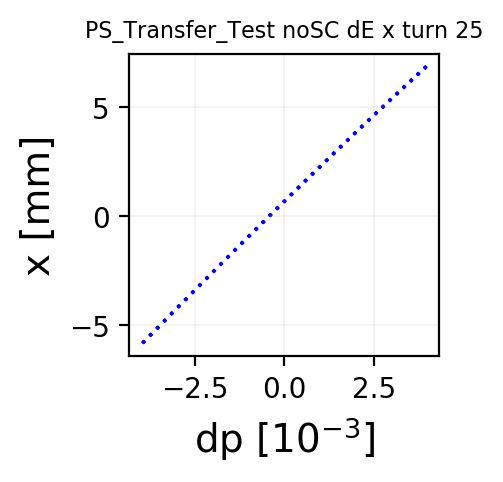

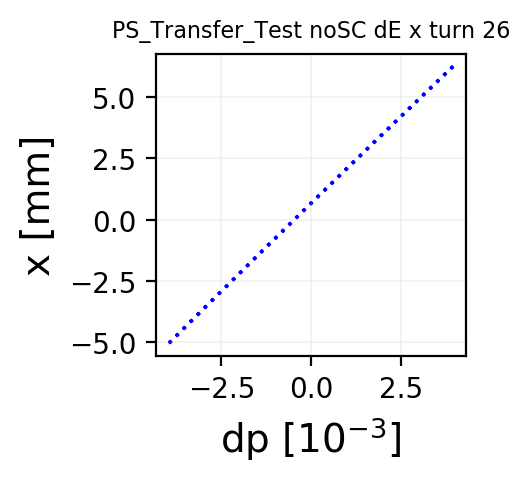

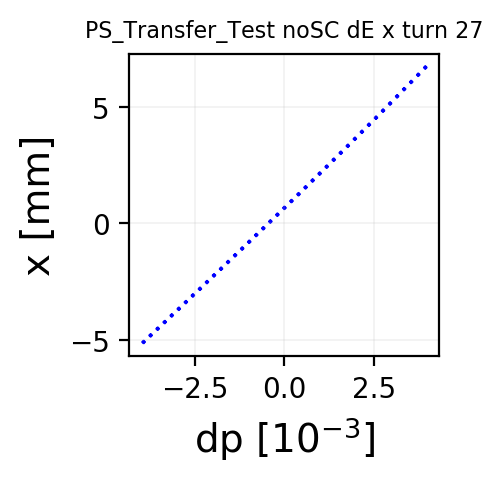

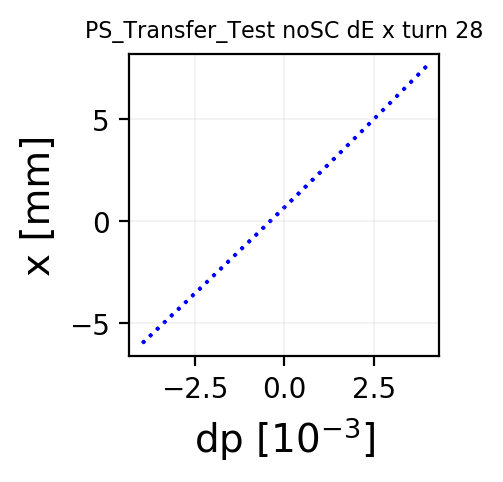

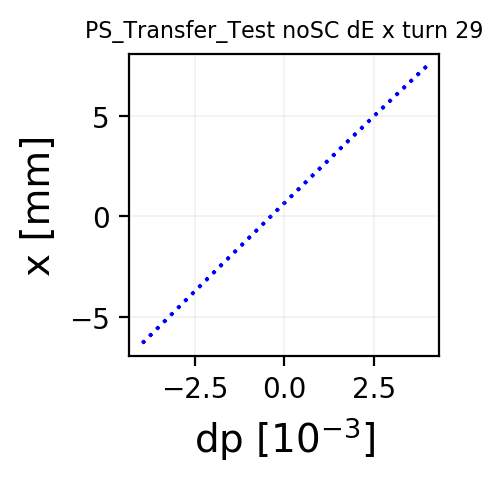

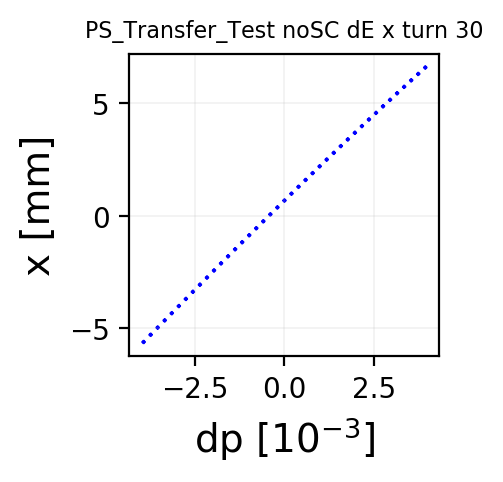

In [21]:
plt.rcParams['figure.figsize'] = [2.0, 2.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.titlesize'] = 8

parameter1 = 'dE'
parameter2 = 'x'
multi1 = 1E3
multi2 = 1E3

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044


for key, value in sorted(dd_op.iteritems()):
    
    fig1, ax1 = plt.subplots(1)
    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)    
    ax1.set_title(tit);
    ax1.set_xlabel(r'dp [$10^{-3}$]');
    ax1.set_ylabel('x [mm]');

    s = np.ones(len(dd_op[key]['particles'][parameter1][0][0][0]))
    #ax1.scatter((dd_lat[key]['particles'][parameter1][0][0][0])*multi1, (dd_lat[key]['particles'][parameter2][0][0][0] - closed_orbit_x)*multi2, color='k', marker='x', s=s);
    ax1.scatter((dd_op[key]['particles'][parameter1][0][0][0])*multi1, (dd_op[key]['particles'][parameter2][0][0][0] - closed_orbit_x)*multi2, color='b', marker='x', s=s);
    #ax1.scatter((dd_ReM[key]['particles'][parameter1][0][0][0])*multi1, (dd_ReM[key]['particles'][parameter2][0][0][0] - closed_orbit_x)*multi2, color='r', marker='x', s=s);

    #ax1.legend(fontsize='x-small', loc=4, title=legend_label)
    ax1.grid(linewidth=0.1)
    #ax1.set_xlim(-2E-3, 2E-3)
    #ax1.set_xlim(-10, 10)
    custom_lines = [Line2D([0], [0], color='k', lw=1),
                    Line2D([0], [0], color='b', lw=1),
                    Line2D([0], [0], color='r', lw=1)]

    #ax1.legend(custom_lines, ['Lattice', 'Operational', 'ReMatched'], fontsize='x-small', loc=1)
    #savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'
    
    #bw_gifnames_x_xp.append(savename)
    
    #fig1.savefig(savename, dpi = 100)
    #plt.close()

## Add fitting to separate linear and non-linear dispersion

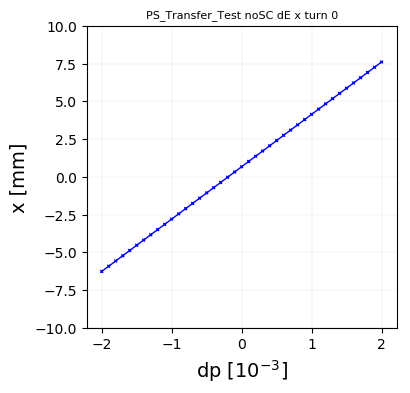

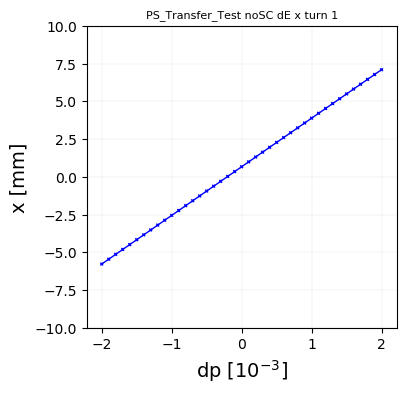

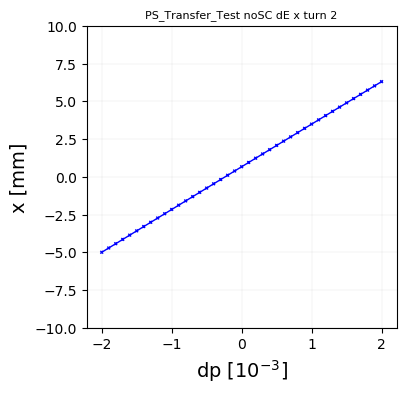

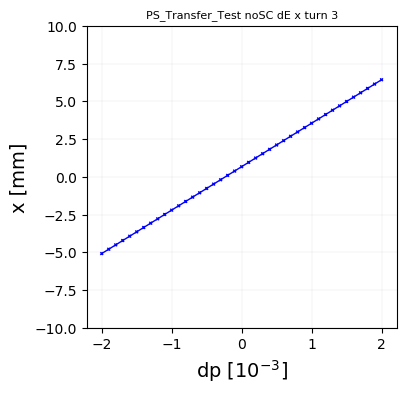

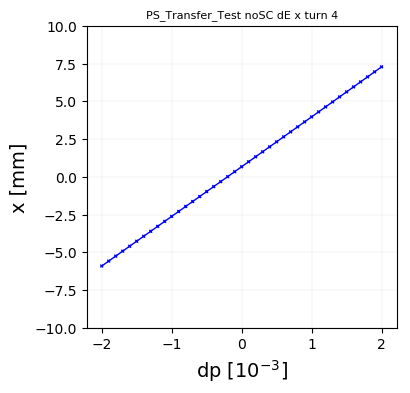

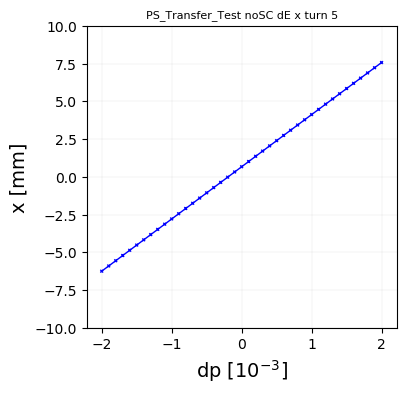

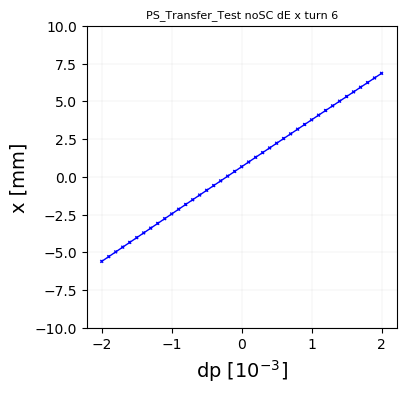

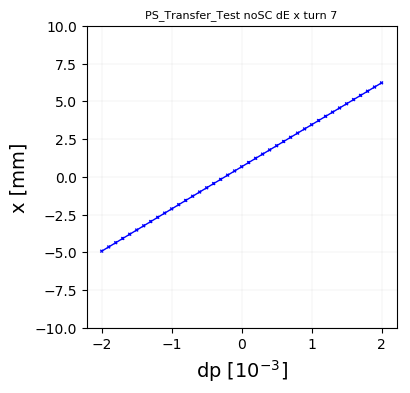

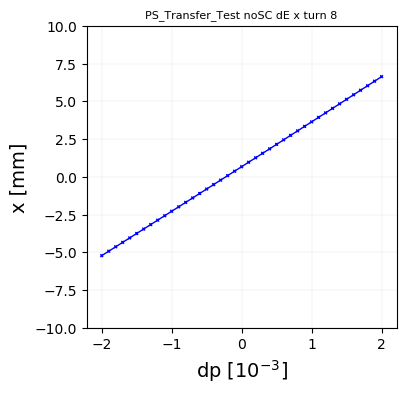

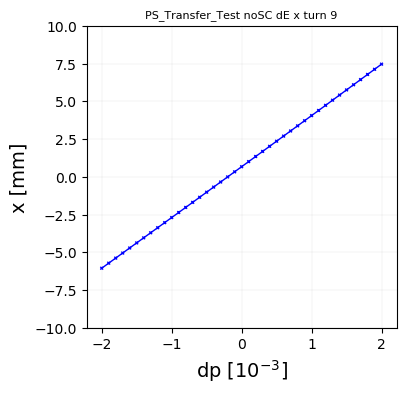

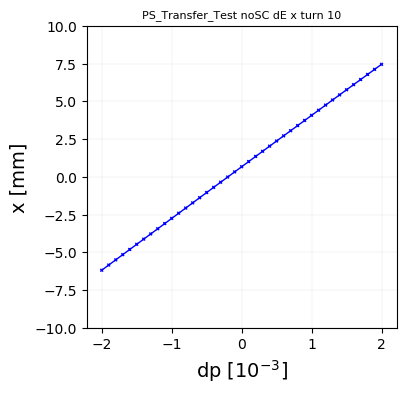

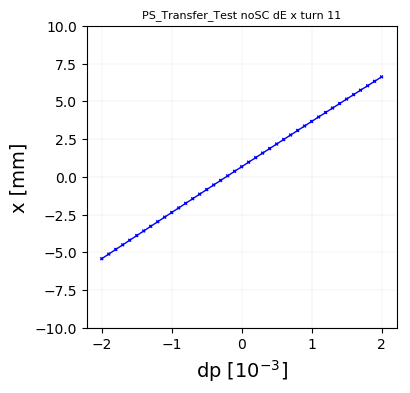

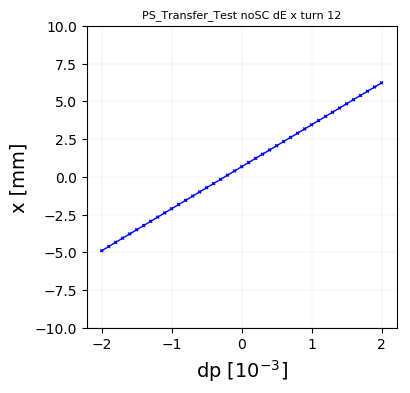

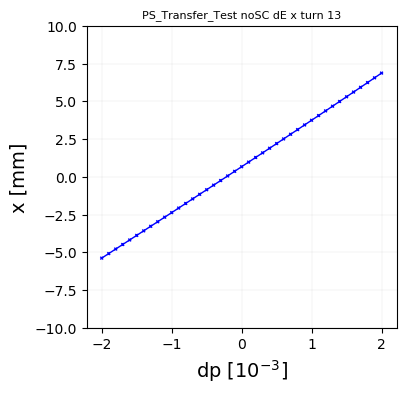

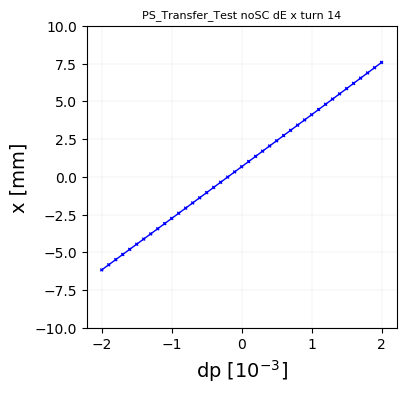

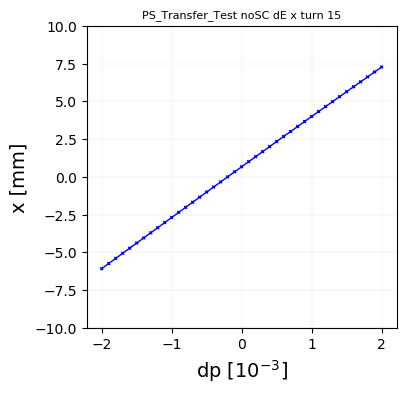

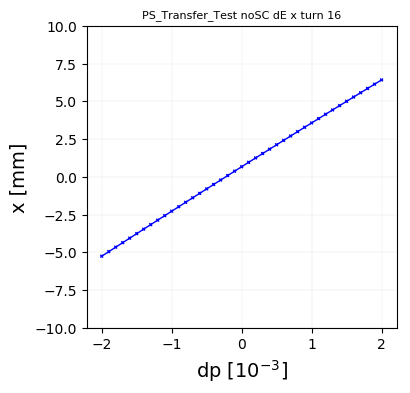

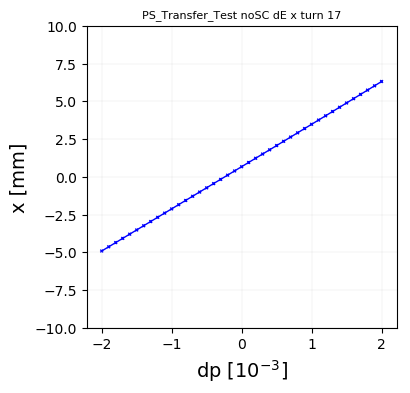

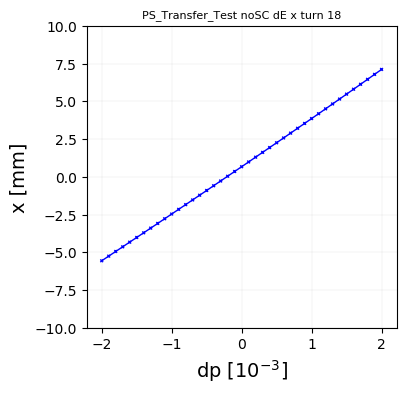

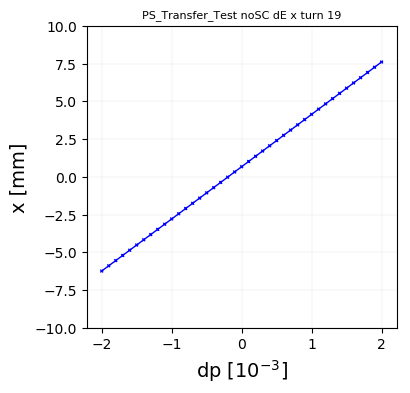

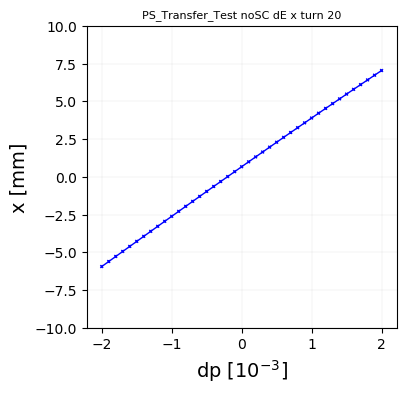

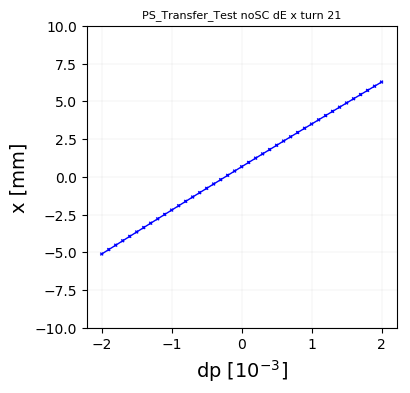

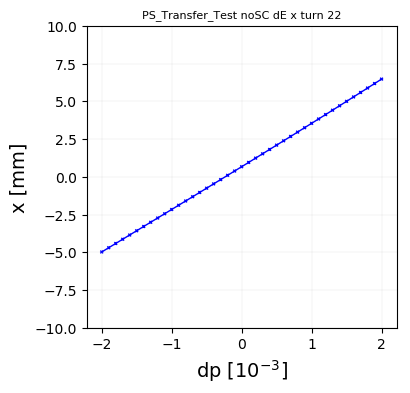

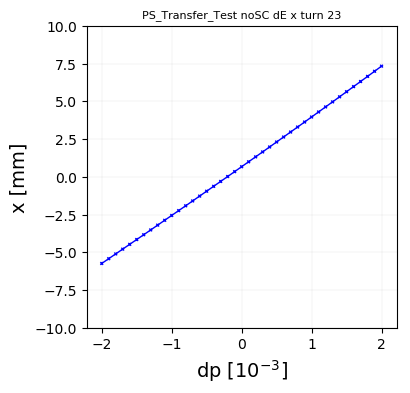

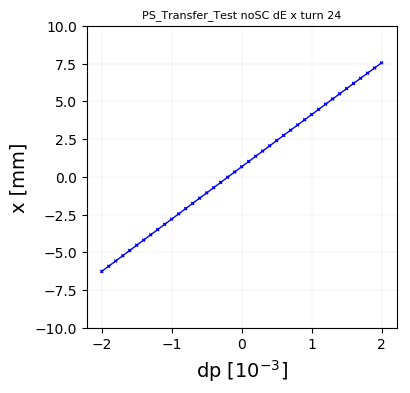

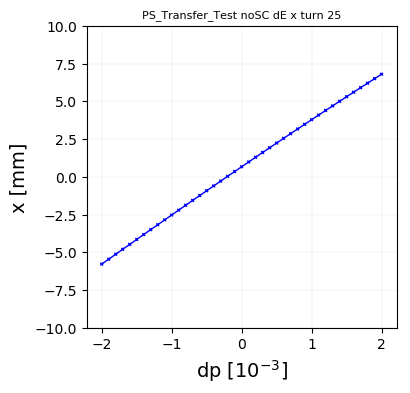

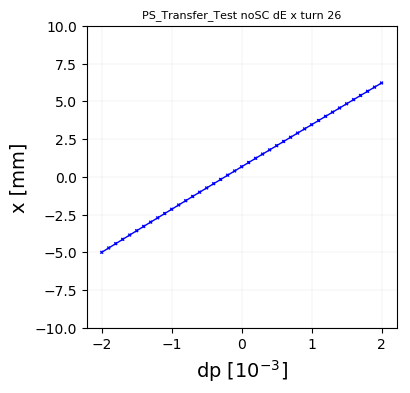

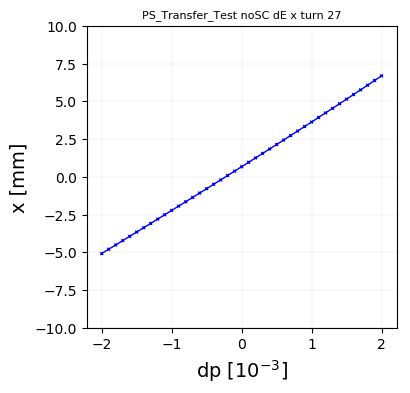

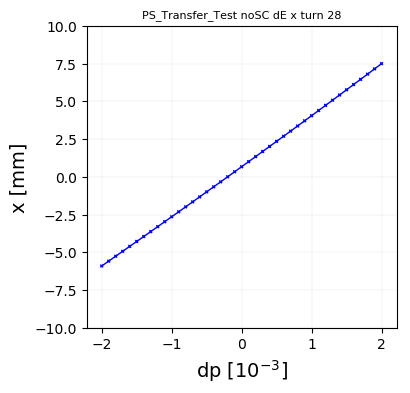

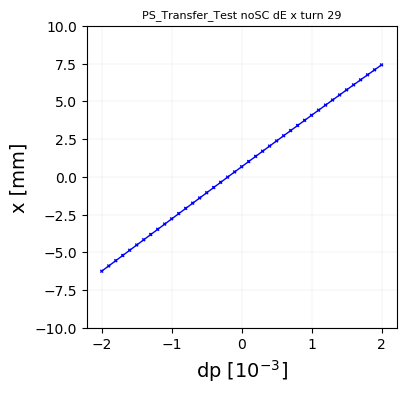

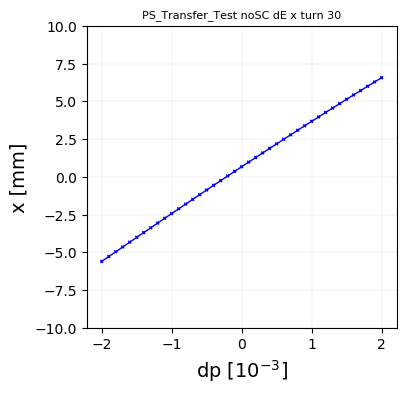

In [24]:
plt.rcParams['figure.figsize'] = [4.0, 4.0]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['axes.titlesize'] = 8

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'dE'
parameter2 = 'x'
multi1 = 1E3
multi2 = 1E3

bet_x = 0.91

SEM_D_OP = []  
SEM_D2_OP = []  
SEM_D_LAT = []  
SEM_D2_LAT = []  
SEM_D_REM = []  
SEM_D2_REM = []  
i = 0

SIM_D3_OP = []
SIM_Intercept_OP = []
SIM_D3_LAT = []
SIM_Intercept_LAT = []
SIM_D3_REM = []
SIM_Intercept_REM = []

for key, value in sorted(dd_op.iteritems()):
    
    fig1, ax1 = plt.subplots(1)
    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)    
    ax1.set_title(tit);
    ax1.set_xlabel(r'dp [$10^{-3}$]');
    ax1.set_ylabel('x [mm]');
    
    # Fit dispersion vector as cubic
    #popt_Lat, pcov_Lat = curve_fit(cubic,((dd_lat[key]['particles'][parameter1][0][0][0])/E/Beta**2), (dd_lat[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2)
    #SEM_D_LAT.append(popt_Lat[1]*1E-3)
    #SEM_D2_LAT.append(popt_Lat[0]*1E-3) 
    #SIM_D3_LAT.append(popt_Lat[3])
    #SIM_Intercept_LAT.append(popt_Lat[2])
    
    popt_op, pcov_op = curve_fit(cubic,((dd_op[key]['particles'][parameter1][0][0][0])/E/Beta**2), (dd_op[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2)
    SEM_D_OP.append(popt_op[1]*1E-3)
    SEM_D2_OP.append(popt_op[0]*1E-3)   
    SIM_D3_OP.append(popt_op[3])
    SIM_Intercept_OP.append(popt_op[2])

    #popt_ReM, pcov_Lat = curve_fit(cubic,((dd_ReM[key]['particles'][parameter1][0][0][0])/E/Beta**2), (dd_ReM[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2)
    #SEM_D_REM.append(popt_ReM[1]*1E-3)
    #SEM_D2_REM.append(popt_ReM[0]*1E-3)  
    #SIM_D3_REM.append(popt_ReM[3])
    #SIM_Intercept_REM.append(popt_ReM[2])  

    min_dp = np.min(((dd_op[key]['particles'][parameter1][0][0][0])/E/Beta**2))
    max_dp = np.max(((dd_op[key]['particles'][parameter1][0][0][0])/E/Beta**2))
    DELTAP_range = np.arange(min_dp, max_dp, 0.1e-4)        
    #ax1.plot(DELTAP_range*multi1, cubic(DELTAP_range,popt_Lat[0],popt_Lat[1],popt_Lat[2],popt_Lat[3]),'-k')
    ax1.plot(DELTAP_range*multi1, cubic(DELTAP_range,popt_op[0],popt_op[1],popt_op[2],popt_op[3]),'-b')
    #ax1.plot(DELTAP_range*multi1, cubic(DELTAP_range,popt_ReM[0],popt_ReM[1],popt_ReM[2],popt_ReM[3]),'-r')

    # Plot particles
    s = np.ones(len(dd_op[key]['particles'][parameter1][0][0][0]))*4
    #ax1.scatter(((dd_lat[key]['particles'][parameter1][0][0][0])/E/Beta**2)*multi1, (dd_lat[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color='k', marker='x', s=s);
    ax1.scatter(((dd_op[key]['particles'][parameter1][0][0][0])/E/Beta**2)*multi1, (dd_op[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color='b', marker='x', s=s);
    #ax1.scatter(((dd_ReM[key]['particles'][parameter1][0][0][0])/E/Beta**2)*multi1, (dd_ReM[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color='r', marker='x', s=s);

    ax1.grid(linewidth=0.1)
    ax1.set_ylim(-10, 10)
    
    custom_lines = [Line2D([0], [0], color='k', lw=1),
                Line2D([0], [0], color='b', lw=1),
                Line2D([0], [0], color='r', lw=1)]

    #ax1.legend(custom_lines, ['Lattice', 'Operational', 'ReMatched'], fontsize='x-small', loc=1)
 
    plot_savename = 'Plots/dE_x/Turn_' + str(key) + '.png'
    plt.savefig(plot_savename, dpi = 600)

In [26]:
print SEM_D_OP[0]
print SEM_D2_OP[0]
#print SEM_D_LAT[0]
#print SEM_D2_LAT[0]
#print SEM_D_REM[0]
#print SEM_D2_REM[0]

3.4679999919780737
4.575474223208595e-06


In [27]:
print '\n\tINITIAL VALUE SUMMARY'
print '\nD_0 OP = ', SEM_D_OP[0]
#print 'D_0 LAT = ',  SEM_D_LAT[0]
#print 'D_0 ReM = ',  SEM_D_REM[0]

print '\nD_1 OP = ', SEM_D2_OP[0]
#print 'D_1 LAT = ', SEM_D2_LAT[0]
#print 'D_1 ReM = ', SEM_D2_REM[0]

print '\nD_2 OP = ', SIM_D3_OP[0]
#print 'D_2 LAT = ', SIM_D3_LAT[0]
#print 'D_2 ReM = ', SIM_D3_REM[0]

print '\nC OP = ', SIM_Intercept_OP[0]
#print 'C LAT = ', SIM_Intercept_LAT[0]
#print 'C ReM = ', SIM_Intercept_REM[0]


	INITIAL VALUE SUMMARY

D_0 OP =  3.4679999919780737

D_1 OP =  4.575474223208595e-06

D_2 OP =  2.7464645351660106

C OP =  0.6689999928699403


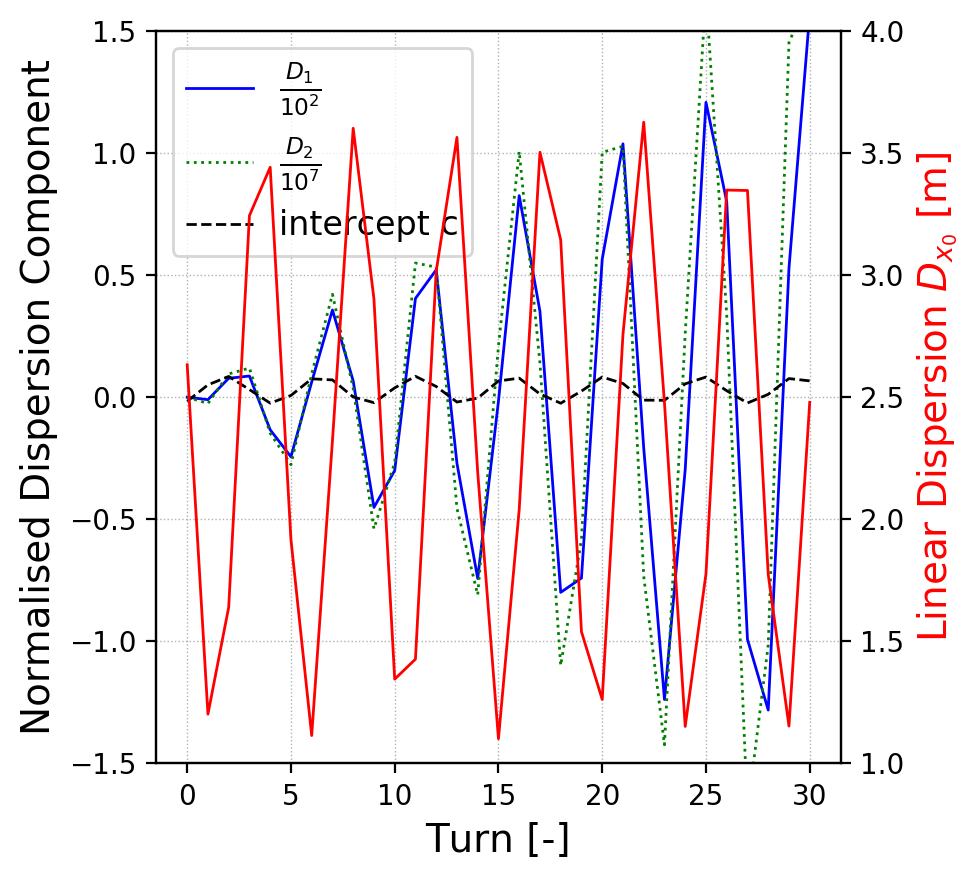

In [31]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

trns = 31
turns = np.arange(0, trns, 1)

x = np.array(turns)

y = np.array(SEM_D_OP)
ax2.plot(x, y,'r',label = r'$D_0$')

y = np.array(SEM_D2_OP)/100
ax1.plot(x, y,'b',label = r'$\frac{D_1}{10^2}$')

y = np.array(SIM_D3_OP)/1E7
ax1.plot(x, y,'g',label = r'$\frac{D_2}{10^7}$', ls=':')

y = np.array(SIM_Intercept_OP)
ax1.plot(x, y,'k',label = 'intercept c', ls='--')

ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(1, 4)

ax1.set_ylabel('Normalised Dispersion Component', color='k')
ax2.set_ylabel(r'Linear Dispersion $D_{x_0}$ [m]', color='r')
ax1.set_xlabel('Turn [-]')

ax1.legend(loc=2)
ax1.grid(ls=':', lw=0.5)

plt.tight_layout()
plt.savefig('Plots/Fitted_Dispersion_Components_OP.png', dpi = 600)

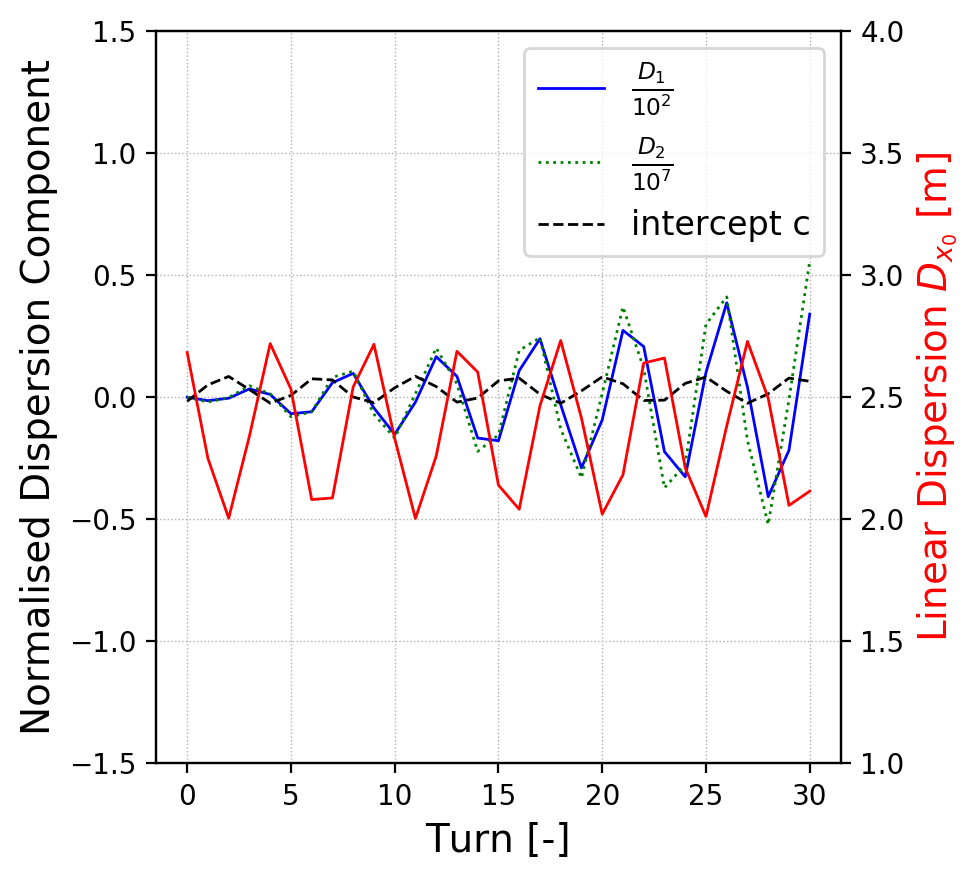

In [32]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

trns = 31
turns = np.arange(0, trns, 1)

x = np.array(turns)

y = np.array(SEM_D_REM)
ax2.plot(x, y,'r',label = r'$D_0$')

y = np.array(SEM_D2_REM)/100
ax1.plot(x, y,'b',label = r'$\frac{D_1}{10^2}$')

y = np.array(SIM_D3_REM)/1E7
ax1.plot(x, y,'g',label = r'$\frac{D_2}{10^7}$', ls=':')

y = np.array(SIM_Intercept_REM)
ax1.plot(x, y,'k',label = 'intercept c', ls='--')

ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(1, 4)

ax1.set_ylabel('Normalised Dispersion Component', color='k')
ax2.set_ylabel(r'Linear Dispersion $D_{x_0}$ [m]', color='r')
ax1.set_xlabel('Turn [-]')

ax1.legend(loc=1)
ax1.grid(ls=':', lw=0.5)

plt.tight_layout()
plt.savefig('Plots/Fitted_Dispersion_Components_REM.png', dpi = 600)

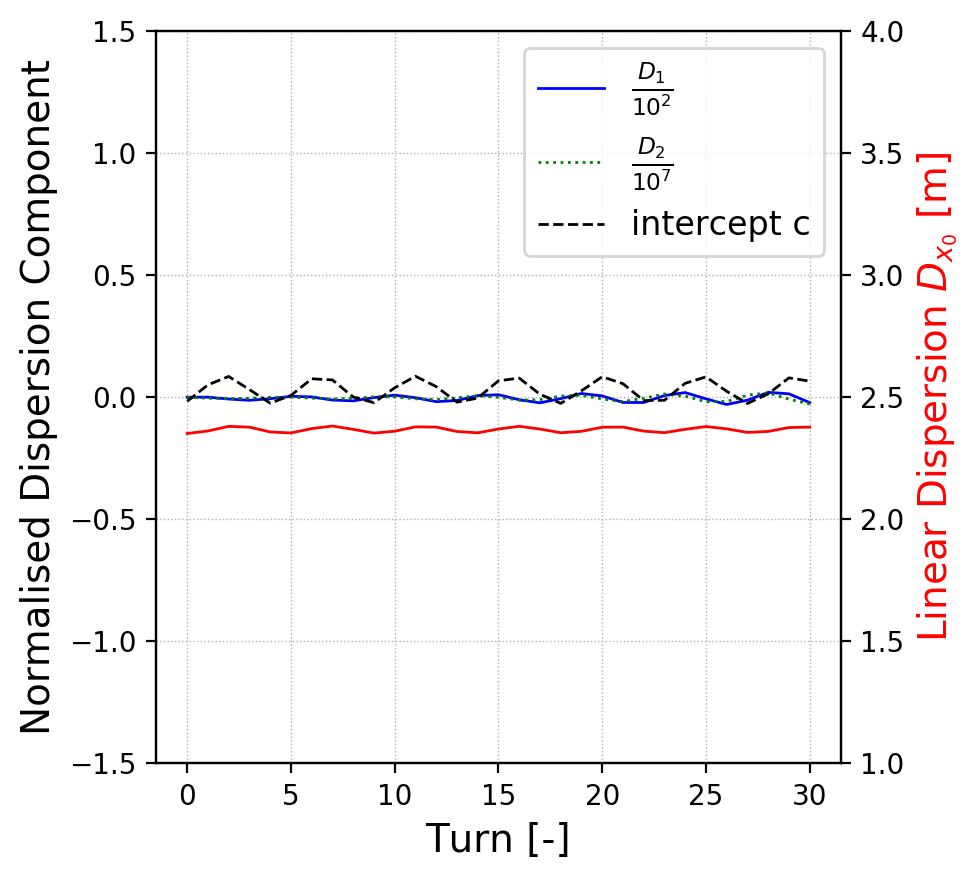

In [33]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

trns = 31
turns = np.arange(0, trns, 1)

x = np.array(turns)

y = np.array(SEM_D_LAT)
ax2.plot(x, y,'r',label = r'$D_0$')

y = np.array(SEM_D2_LAT)/100
ax1.plot(x, y,'b',label = r'$\frac{D_1}{10^2}$')

y = np.array(SIM_D3_LAT)/1E7
ax1.plot(x, y,'g',label = r'$\frac{D_2}{10^7}$', ls=':')

y = np.array(SIM_Intercept_LAT)
ax1.plot(x, y,'k',label = 'intercept c', ls='--')

ax1.set_ylim(-1.5, 1.5)
ax2.set_ylim(1, 4)

ax1.set_ylabel('Normalised Dispersion Component', color='k')
ax2.set_ylabel(r'Linear Dispersion $D_{x_0}$ [m]', color='r')
ax1.set_xlabel('Turn [-]')

ax1.legend(loc=1)
ax1.grid(ls=':', lw=0.5)

plt.tight_layout()
plt.savefig('Plots/Fitted_Dispersion_Components_LAT.png', dpi = 600)

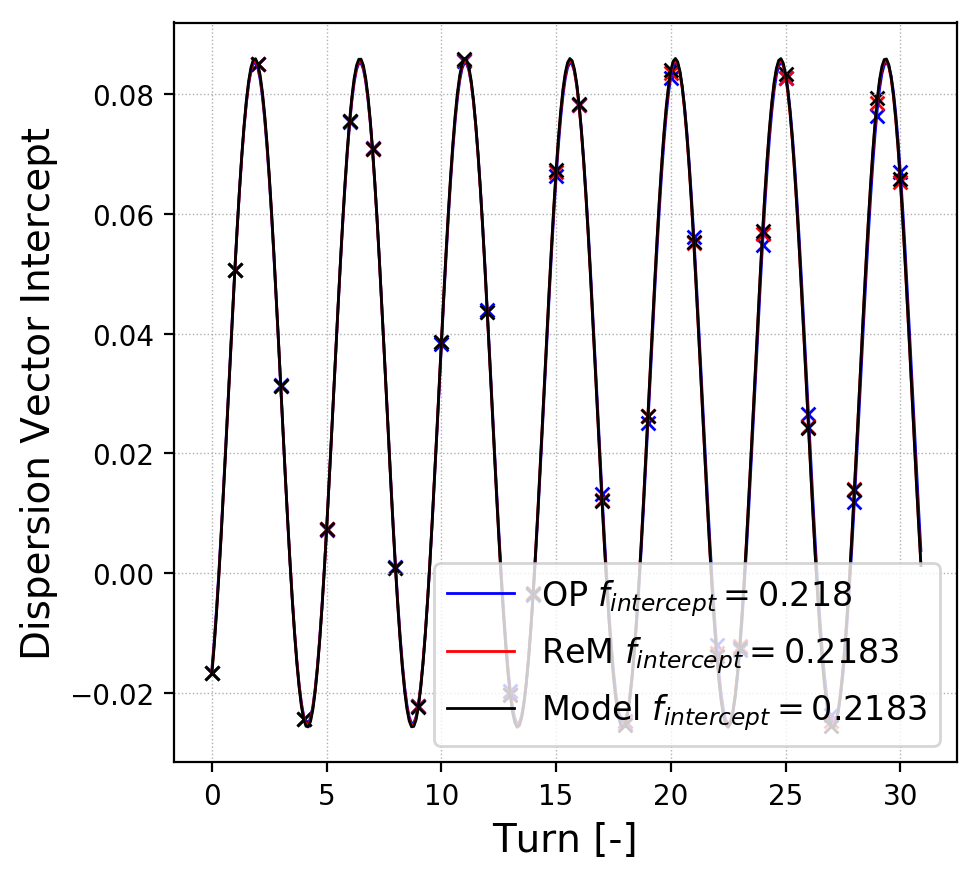

In [34]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 31
turns = np.arange(0, trns, 1)
turns_fine = np.arange(0, trns, 0.1)

x = np.array(turns)

y = np.array(SIM_Intercept_OP)
popt_Lat, pcov_Lat = curve_fit(harmonic_fn, x, y, method = 'trf', bounds =((-1,-np.inf,-np.inf,0.1499),(1,np.inf,np.inf,0.2499)))
lab_= r'OP $f_{intercept} = $'+ str(round_sig(popt_Lat[3],4))
plt.plot(turns_fine, harmonic_fn(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'b',label = lab_)
plt.scatter(x, y, color='b',marker='x')

y = np.array(SIM_Intercept_REM)
popt_Lat, pcov_Lat = curve_fit(harmonic_fn, x, y, method = 'trf', bounds =((-1,-np.inf,-np.inf,0.1499),(1,np.inf,np.inf,0.2499)))
lab_= r'ReM $f_{intercept} = $'+ str(round_sig(popt_Lat[3],4))
plt.plot(turns_fine, harmonic_fn(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'r',label = lab_)
plt.scatter(x, y, color='r',marker='x')

y = np.array(SIM_Intercept_LAT)
popt_Lat, pcov_Lat = curve_fit(harmonic_fn, x, y, method = 'trf', bounds =((-1,-np.inf,-np.inf,0.1499),(1,np.inf,np.inf,0.2499)))
lab_= r'Model $f_{intercept} = $'+ str(round_sig(popt_Lat[3],4))
plt.plot(turns_fine, harmonic_fn(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_)
plt.scatter(x, y, color='k',marker='x')

plt.ylabel('Dispersion Vector Intercept')
plt.xlabel('Turn [-]')
ax1.legend(loc=4)
plt.grid(ls=':', lw=0.5)

plt.tight_layout()
plt.savefig('Plots/Fitted_Dispersion_Intercepts.png', dpi = 600)

In [35]:
print len(SEM_D_OP)

31


In [36]:
# Remove turn -1
#SEM_D_OP = SEM_D_OP[1:]
#SEM_D2_OP = SEM_D2_OP[1:]
#SEM_D_LAT = SEM_D_LAT[1:]
#SEM_D2_LAT = SEM_D2_LAT[1:]
#SEM_D_REM = SEM_D_REM[1:]
#SEM_D2_REM = SEM_D2_REM[1:]

## Plot dispersion beating

2.367198675578351
2.3672286957814133
2.367119854446797


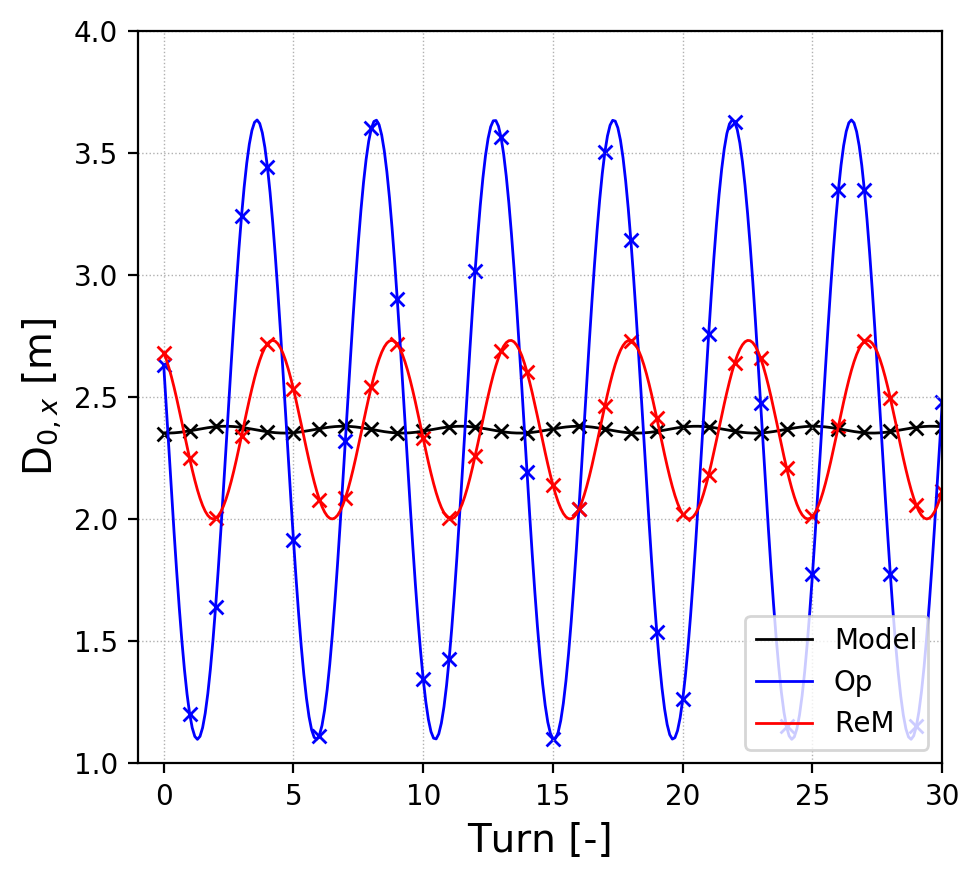

In [38]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

trns = 31
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 31, 0.1)

y_Lat = (SEM_D_LAT-np.mean(SEM_D_LAT))
freq_Lat = pnf.naff(y_Lat, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lattice freq=' + str(round_sig(freq_Lat))

y_Op = (SEM_D_OP-np.mean(SEM_D_OP))
freq_Op = pnf.naff(y_Op, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Operational freq=' + str(round_sig(freq_Op))

y_ReM = (SEM_D_REM-np.mean(SEM_D_REM))
freq_ReM = pnf.naff(y_ReM, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]

popt_Lat, pcov_Lat = curve_fit(Md_fit, turns, SEM_D_LAT, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_LAT, marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = 'Model')
#plt.plot([turns[0], turns[-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_op, pcov_op = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_OP, marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_op[0], popt_op[1], popt_op[2], popt_op[3]),'b',label = 'Op')
#plt.plot([turns[0], turns[-1]], [popt_op[0],popt_op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, turns, SEM_D_REM, method = 'trf', bounds =((2,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_REM, marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = 'ReM')
#plt.plot([turns[0], turns[-1]], [popt_ReM[0],popt_ReM[0]],'--r')
print popt_ReM[0]
print popt_op[0]
print popt_Lat[0]

plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((1, 4))
plt.grid(ls=':', lw=0.5)
plt.legend(loc = 4, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.tight_layout()

plt.savefig('Plots/D0_NoRF_NoSC.png', dpi = 600)

2.367198675578351
2.3672286957814133
2.367119854446797


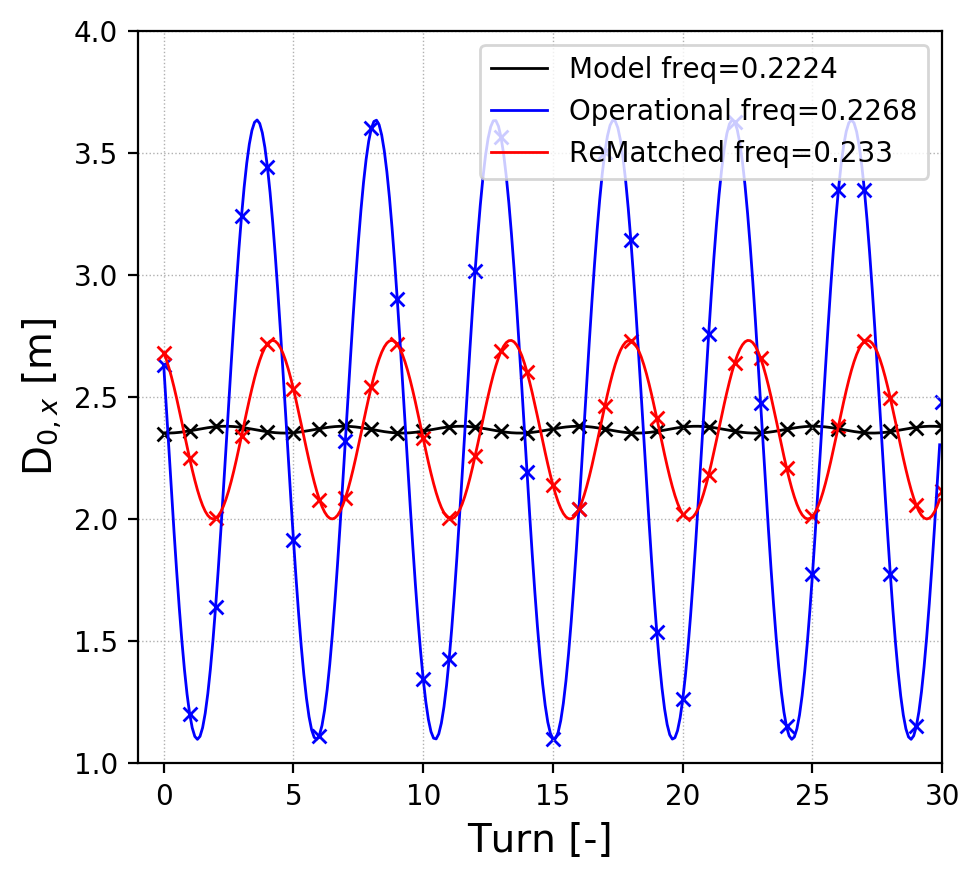

In [39]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

trns = 31
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 30, 0.1)

y_Lat = (SEM_D_LAT-np.mean(SEM_D_LAT))
freq_Lat = pnf.naff(y_Lat, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Model freq=' + str(round_sig(freq_Lat))

y_Op = (SEM_D_OP-np.mean(SEM_D_OP))
freq_Op = pnf.naff(y_Op, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Operational freq=' + str(round_sig(freq_Op))

y_ReM = (SEM_D_REM-np.mean(SEM_D_REM))
freq_ReM = pnf.naff(y_ReM, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReMatched freq=' + str(round_sig(freq_ReM,3))

popt_Lat, pcov_Lat = curve_fit(Md_fit, turns, SEM_D_LAT, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_LAT, marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_Lat)
#plt.plot([turns[0], turns[-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_op, pcov_op = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_OP, marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_op[0], popt_op[1], popt_op[2], popt_op[3]),'b',label = lab_Op)
#plt.plot([turns[0], turns[-1]], [popt_op[0],popt_op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, turns, SEM_D_REM, method = 'trf', bounds =((2,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_REM, marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = lab_ReM)
#plt.plot([turns[0], turns[-1]], [popt_ReM[0],popt_ReM[0]],'--r')
print popt_ReM[0]
print popt_op[0]
print popt_Lat[0]

plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((1, 4))
plt.grid(ls=':', lw=0.5)
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.tight_layout()

plt.savefig('Plots/D0_NoRF_NoSC_NAFF.png', dpi = 600)

## Plot normalised dispersion beating

0.6847795094459544
0.6847881936300882
0.6847567082407627

0.7761050915271888
0.7616701017129857
0.6801985696952


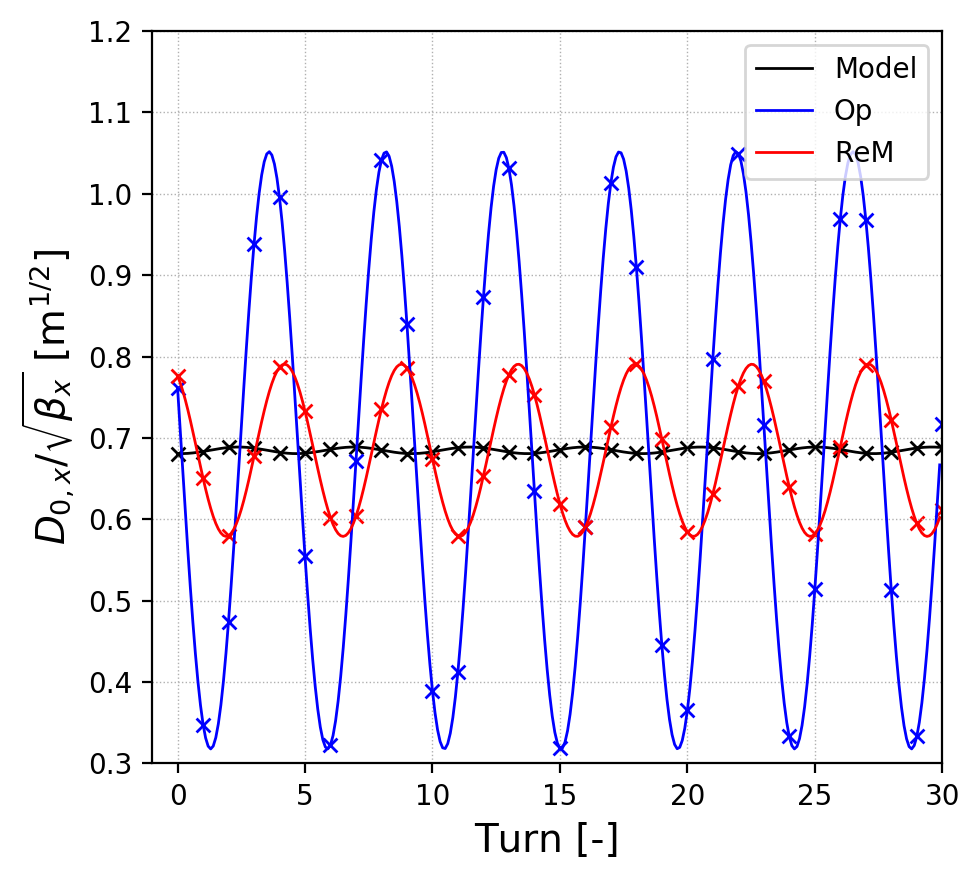

In [44]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

trns = 31
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 30, 0.1)

y_Lat = (SEM_D_LAT-np.mean(SEM_D_LAT))
freq_Lat = pnf.naff(y_Lat, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Model freq=' + str(round_sig(freq_Lat))

y_Op = (SEM_D_OP-np.mean(SEM_D_OP))
freq_Op = pnf.naff(y_Op, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Operational freq=' + str(round_sig(freq_Op))

y_ReM = (SEM_D_REM-np.mean(SEM_D_REM))
freq_ReM = pnf.naff(y_ReM, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReMatched freq=' + str(round_sig(freq_ReM,3))

popt_Lat, pcov_Lat = curve_fit(Md_fit, turns, SEM_D_LAT/np.sqrt(11.95), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_LAT/np.sqrt(11.95), marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = 'Model')
#plt.plot([turns[0], turns[-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_op, pcov_op = curve_fit(Md_fit, turns, SEM_D_OP/np.sqrt(11.95), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_OP/np.sqrt(11.95), marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_op[0], popt_op[1], popt_op[2], popt_op[3]),'b',label = 'Op')
#plt.plot([turns[0], turns[-1]], [popt_op[0],popt_op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, turns, SEM_D_REM/np.sqrt(11.95), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_REM/np.sqrt(11.95), marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = 'ReM')
#plt.plot([turns[0], turns[-1]], [popt_ReM[0],popt_ReM[0]],'--r')
print popt_ReM[0]
print popt_op[0]
print popt_Lat[0]

print '\n', SEM_D_REM[0]/np.sqrt(11.95)
print SEM_D_OP[0]/np.sqrt(11.95)
print SEM_D_LAT[0]/np.sqrt(11.95)

plt.xlabel('Turn [-]')
plt.ylabel(r'$D_{0,x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim(0.3,1.2)
plt.grid(ls=':', lw=0.5)
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.tight_layout()

plt.savefig('Plots/D0_norm_NoRF_NoSC.png', dpi = 600)

## Plot normalised dispersion offset

2.3671986755783463


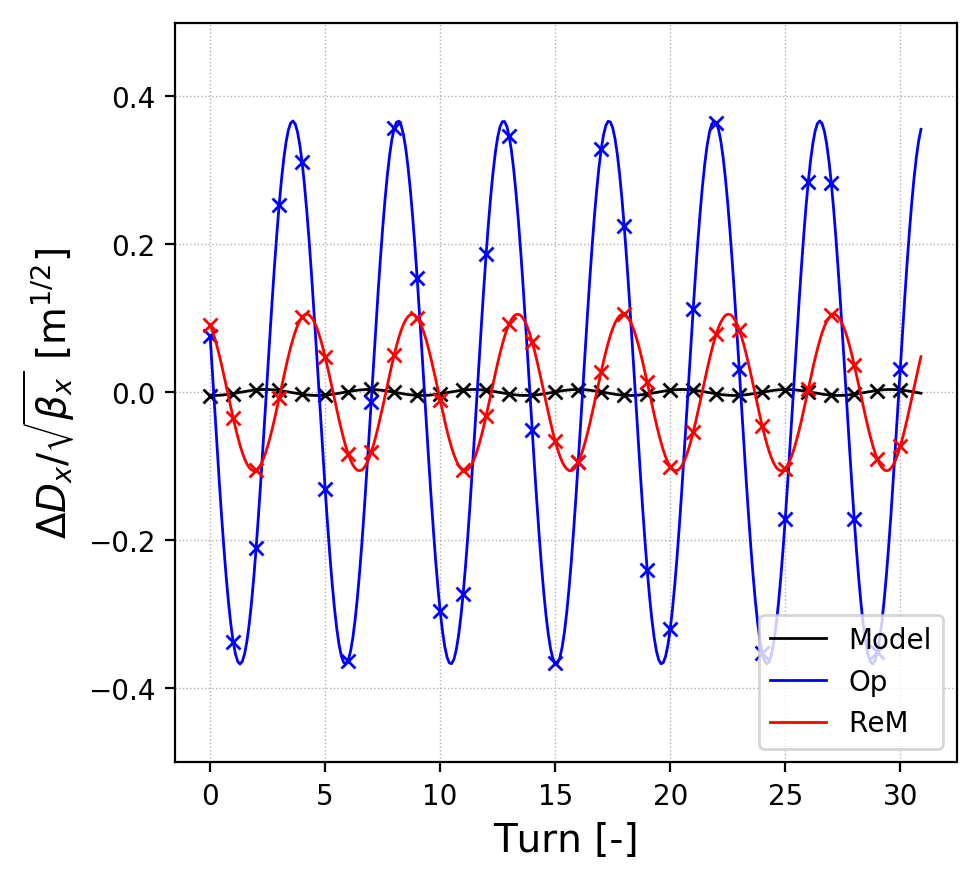

In [169]:
# Plot together the measured and simulated turn-by-turn Normalised dispersion:.
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

trns = 31
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

plt.figure()

popt_LAT_H_sim, pcov_LAT_H_sim = curve_fit(Md_fit, turns, SEM_D_LAT, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.plot(turns, ((SEM_D_LAT)-popt_LAT_H_sim[0])/np.sqrt(11.95),'xk')
plt.plot(turns_fine,(Md_fit(turns_fine,popt_LAT_H_sim[0],popt_LAT_H_sim[1],popt_LAT_H_sim[2],popt_LAT_H_sim[3])-popt_LAT_H_sim[0])/np.sqrt(11.95),'k',label = 'Model')

popt_OP_H_sim, pcov_OP_H_sim = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.plot(turns, ((SEM_D_OP)-popt_OP_H_sim[0])/np.sqrt(11.95),'xb')
plt.plot(turns_fine,(Md_fit(turns_fine,popt_OP_H_sim[0],popt_OP_H_sim[1],popt_OP_H_sim[2],popt_OP_H_sim[3])-popt_OP_H_sim[0])/np.sqrt(11.95),'b',label = 'Op')

popt_REM_H_sim, pcov_REM_H_sim = curve_fit(Md_fit, turns, SEM_D_REM, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
print popt_REM_H_sim[0]
plt.plot(turns, ((SEM_D_REM)-popt_REM_H_sim[0])/np.sqrt(11.95),'xr')
plt.plot(turns_fine,(Md_fit(turns_fine,popt_REM_H_sim[0],popt_REM_H_sim[1],popt_REM_H_sim[2],popt_REM_H_sim[3])-popt_REM_H_sim[0])/np.sqrt(11.95),'r',label = 'ReM')


plt.xlabel('Turn [-]')
plt.ylabel(r'$\Delta D_{x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
plt.ylim((-0.5,0.5))
plt.grid(ls=':', lw=0.5)
plt.legend(loc = 'lower right')
ax = plt.gca()

plt.tight_layout()

plt.savefig('Plots/DeltaD_norm_NoRF_NoSC.png', dpi = 600)

## Save fitting parameters as plots

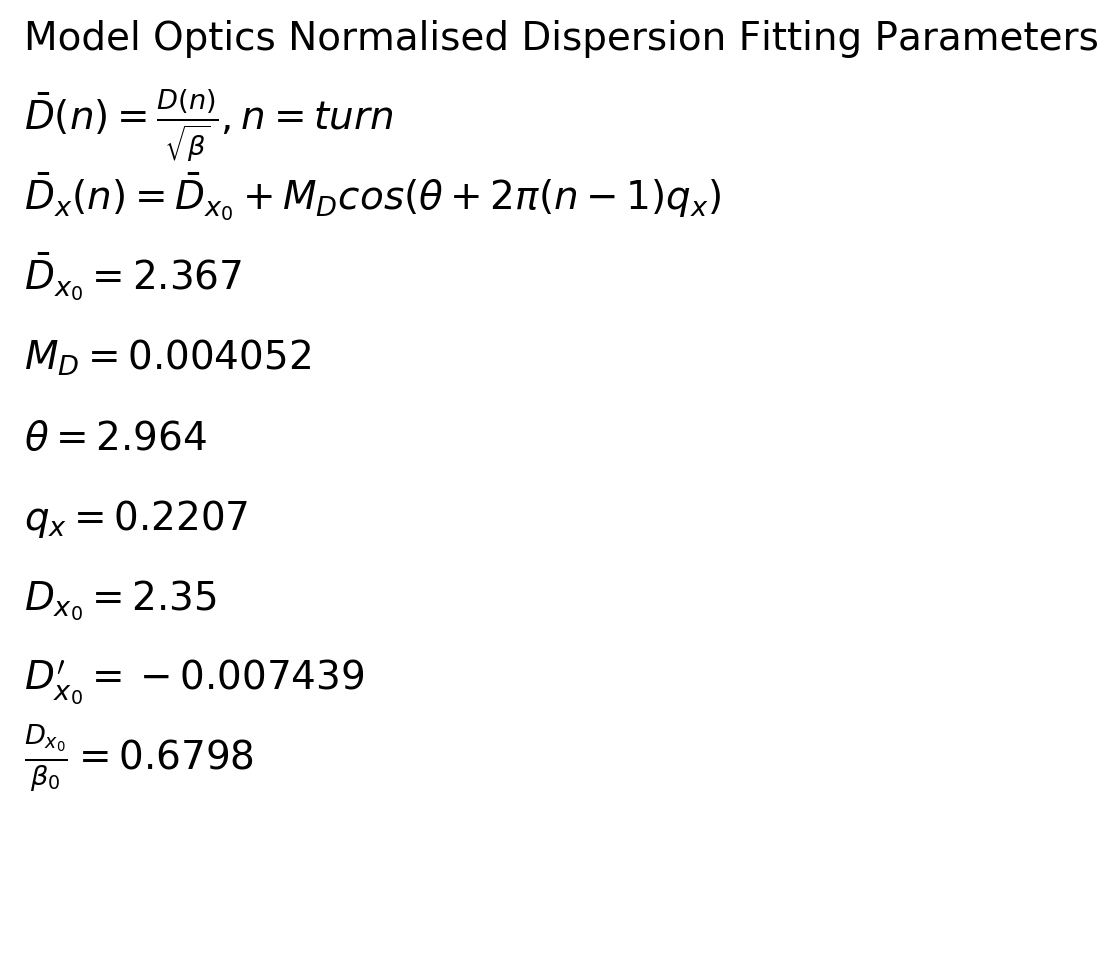

In [170]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]

n = 5 # number of lines

ax2 = plt.axes([0,0,0.2,0.1]) #left,bottom,width,height
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')

a = r'\bar{D}(n) = \frac{D(n)}{\sqrt{\beta}}, n = turn'
b = r'\bar{D}_x(n) = \bar{D}_{x_0} + M_D cos(\theta + 2 \pi (n-1)q_x)'
c = str(r'\bar{D}_{x_0} = ' + str(round_sig(popt_LAT_H_sim[0])))
d = str(r'M_D = ' + str(round_sig(popt_LAT_H_sim[1]/np.sqrt(11.95))))
e = str(r'\theta = ' + str(round_sig(popt_LAT_H_sim[3])))
f = str(r'q_x = ' + str(round_sig( popt_LAT_H_sim[2]/(2*np.pi))))
g = str(r'D_{x_0} = ' + str(round_sig(DX0_lat)))
h = str(r'D^{\prime}_{x_0} = ' + str(round_sig(DPX0_lat)))
i = str(r'\frac{D_{x_0}}{\beta_0} = ' + str(round_sig(DX0_lat/np.sqrt(11.95))))

plt.text(0, n+0.5, 'Model Optics Normalised Dispersion Fitting Parameters',size=14)
plt.text(0, n,'$%s$' %a,size=14,color='k');
plt.text(0, (n-0.5),'$%s$' %b, size=14,color='k');
plt.text(0, (n-1),'$%s$' %c, size=14,color='k');
plt.text(0, (n-1.5),'$%s$' %d, size=14,color='k');
plt.text(0, (n-2),'$%s$' %e, size=14,color='k');
plt.text(0, (n-2.5),'$%s$' %f, size=14,color='k');
plt.text(0, (n-3),'$%s$' %g, size=14,color='k');
plt.text(0, (n-3.5),'$%s$' %h, size=14,color='k');
plt.text(0, (n-4),'$%s$' %i, size=14,color='k');

plt.savefig('Plots/Normalised_Dispersion_Fit_Lat.png')

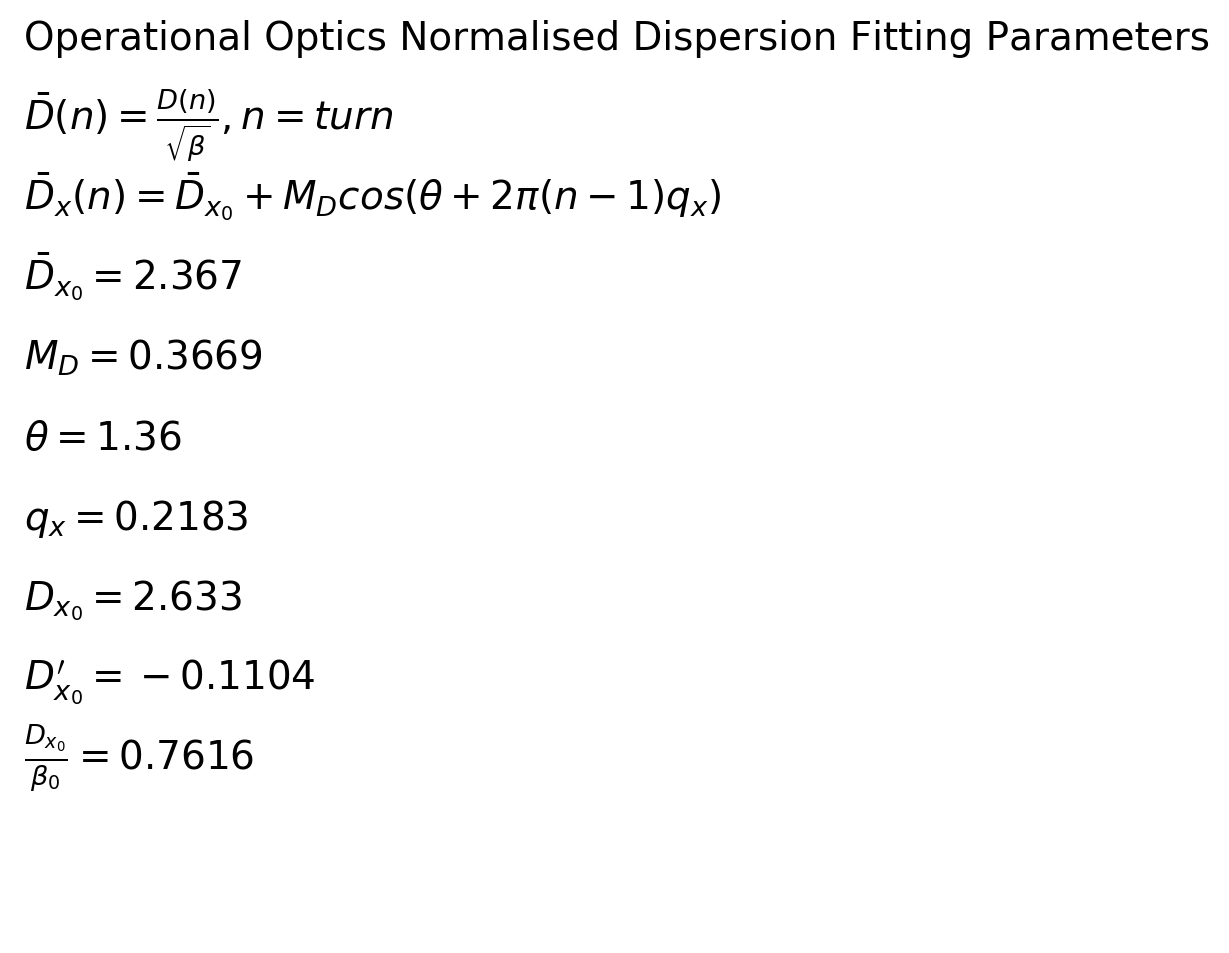

In [171]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]

n = 5 # number of lines

ax2 = plt.axes([0,0,0.2,0.1]) #left,bottom,width,height
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')

a = r'\bar{D}(n) = \frac{D(n)}{\sqrt{\beta}}, n = turn'
b = r'\bar{D}_x(n) = \bar{D}_{x_0} + M_D cos(\theta + 2 \pi (n-1)q_x)'
c = str(r'\bar{D}_{x_0} = ' + str(round_sig(popt_OP_H_sim[0])))# Plot together the measured and simulated turn-by-turn Normalised dispersion:.
plt.rcParams['figure.figsize'] = [8.0, 8.0]
d = str(r'M_D = ' + str(round_sig(popt_OP_H_sim[1]/np.sqrt(11.95))))
e = str(r'\theta = ' + str(round_sig(popt_OP_H_sim[3])))
f = str(r'q_x = ' + str(round_sig( popt_OP_H_sim[2]/(2*np.pi))))
g = str(r'D_{x_0} = ' + str(round_sig(DX0_op)))
h = str(r'D^{\prime}_{x_0} = ' + str(round_sig(DPX0_op)))
i = str(r'\frac{D_{x_0}}{\beta_0} = ' + str(round_sig(DX0_op/np.sqrt(11.95))))

plt.text(0, n+0.5, 'Operational Optics Normalised Dispersion Fitting Parameters',size=14)
plt.text(0, n,'$%s$' %a,size=14,color='k');
plt.text(0, (n-0.5),'$%s$' %b, size=14,color='k');
plt.text(0, (n-1),'$%s$' %c, size=14,color='k');
plt.text(0, (n-1.5),'$%s$' %d, size=14,color='k');
plt.text(0, (n-2),'$%s$' %e, size=14,color='k');
plt.text(0, (n-2.5),'$%s$' %f, size=14,color='k');
plt.text(0, (n-3),'$%s$' %g, size=14,color='k');
plt.text(0, (n-3.5),'$%s$' %h, size=14,color='k');
plt.text(0, (n-4),'$%s$' %i, size=14,color='k');

plt.savefig('Plots/Normalised_Dispersion_Fit_Op.png')

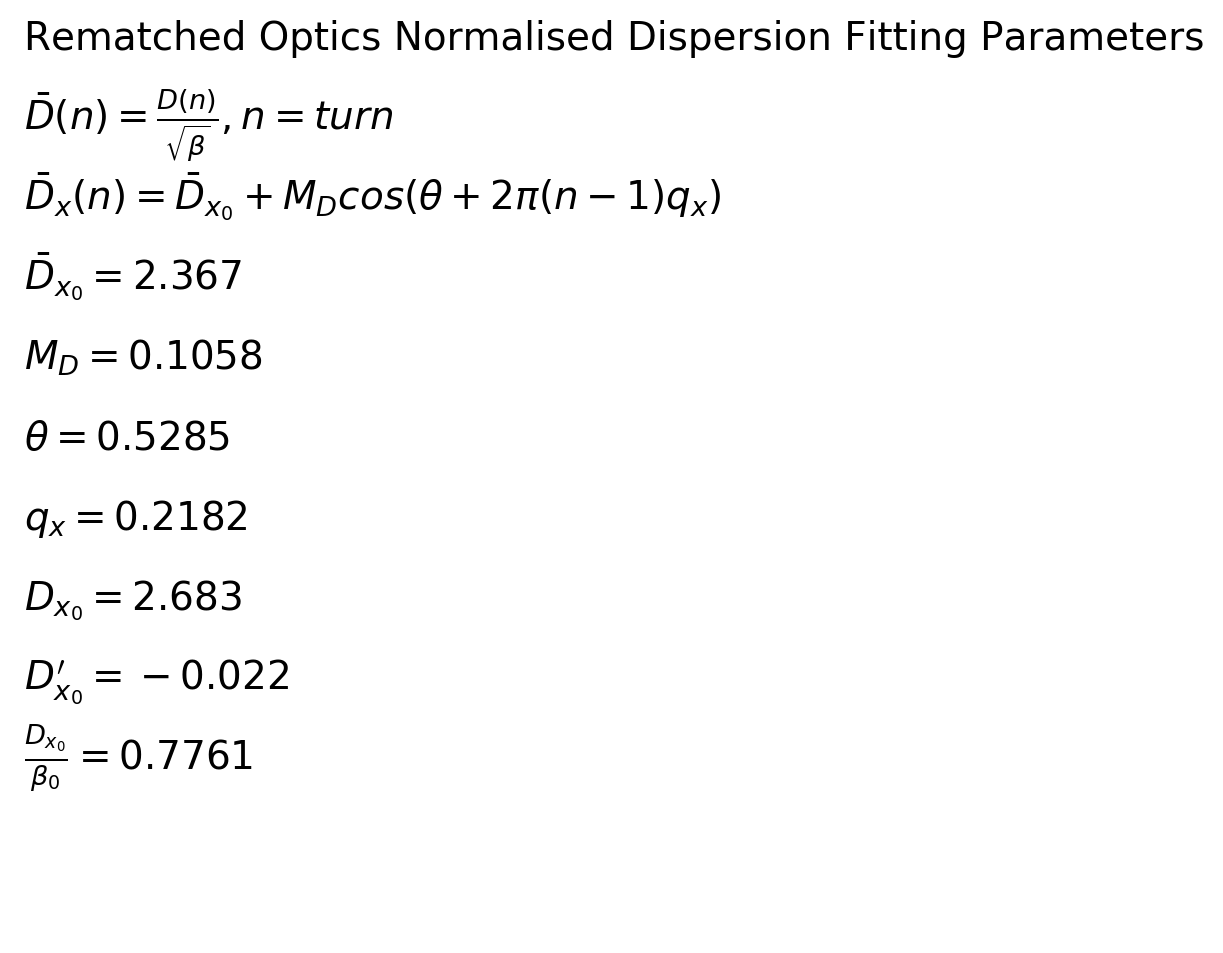

In [172]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]

n = 5 # number of lines

ax2 = plt.axes([0,0,0.2,0.1]) #left,bottom,width,height
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')

a = r'\bar{D}(n) = \frac{D(n)}{\sqrt{\beta}}, n = turn'
b = r'\bar{D}_x(n) = \bar{D}_{x_0} + M_D cos(\theta + 2 \pi (n-1)q_x)'
c = str(r'\bar{D}_{x_0} = ' + str(round_sig(popt_REM_H_sim[0])))
d = str(r'M_D = ' + str(round_sig(popt_REM_H_sim[1]/np.sqrt(11.95))))
e = str(r'\theta = ' + str(round_sig(popt_REM_H_sim[3])))
f = str(r'q_x = ' + str(round_sig( popt_REM_H_sim[2]/(2*np.pi))))
g = str(r'D_{x_0} = ' + str(round_sig(DX0_ReM)))
h = str(r'D^{\prime}_{x_0} = ' + str(round_sig(DPX0_ReM)))
i = str(r'\frac{D_{x_0}}{\beta_0} = ' + str(round_sig(DX0_ReM/np.sqrt(11.95))))

plt.text(0, n+0.5, 'Rematched Optics Normalised Dispersion Fitting Parameters',size=14)
plt.text(0, n,'$%s$' %a,size=14,color='k');
plt.text(0, (n-0.5),'$%s$' %b, size=14,color='k');
plt.text(0, (n-1),'$%s$' %c, size=14,color='k');
plt.text(0, (n-1.5),'$%s$' %d, size=14,color='k');
plt.text(0, (n-2),'$%s$' %e, size=14,color='k');
plt.text(0, (n-2.5),'$%s$' %f, size=14,color='k');
plt.text(0, (n-3),'$%s$' %g, size=14,color='k');
plt.text(0, (n-3.5),'$%s$' %h, size=14,color='k');
plt.text(0, (n-4),'$%s$' %i, size=14,color='k');

plt.savefig('Plots/Normalised_Dispersion_Fit_ReM.png')

## Non-linear Dispersion

5.500000000000001
0.03189400114889222


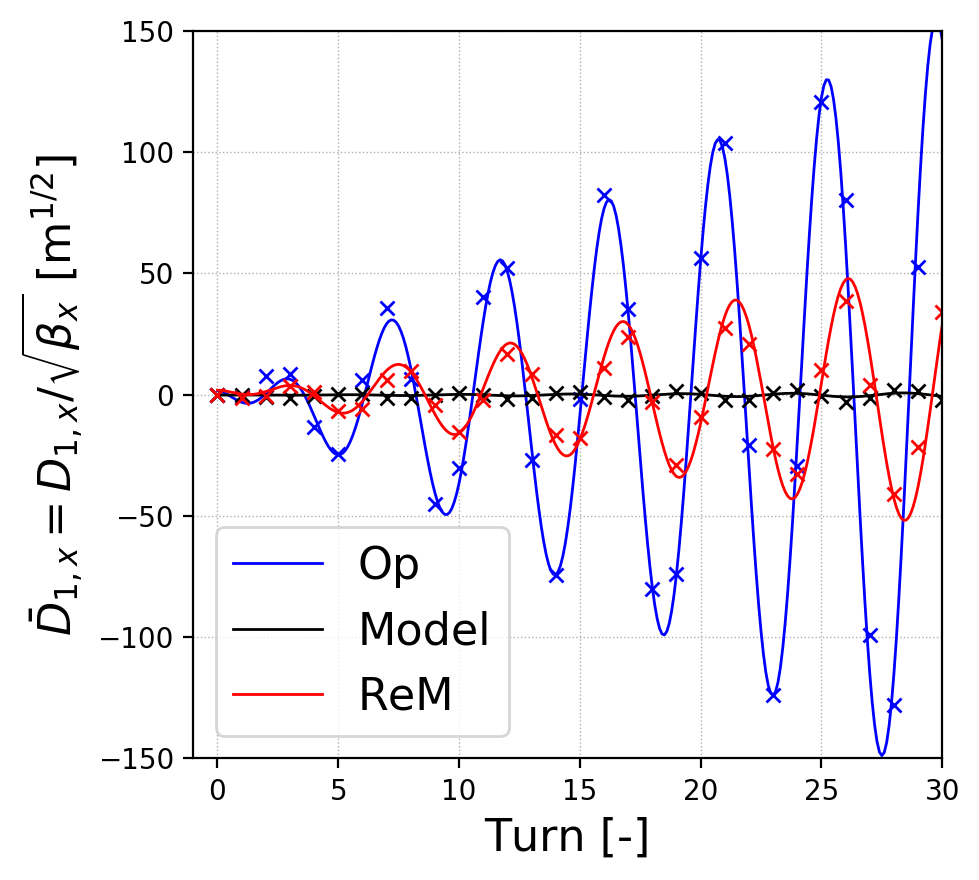

In [173]:
# Plot the turn-by-turn non-linear dispersion

plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

trns = len(SEM_D2_REM)
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

plt.figure()

plt.plot(turns, SEM_D2_OP,'xb')
popt_OP_H_sim_D2, pcov_OP_H_sim_D2 = curve_fit(Md_ramp_fit,turns,SEM_D2_OP/np.sqrt(11.95),method = 'trf',bounds =((-10, 5.5, 1.3, -np.inf),(10, 6, 1.4, np.inf)))
plt.plot(turns_fine,Md_ramp_fit(turns_fine,popt_OP_H_sim_D2[0],popt_OP_H_sim_D2[1],popt_OP_H_sim_D2[2],popt_OP_H_sim_D2[3]),'-b',label = 'Op')
print popt_OP_H_sim_D2[1]

plt.plot(turns, SEM_D2_LAT,'xk')
popt_LAT_H_sim_D2, pcov_LAT_H_sim_D2 = curve_fit(Md_ramp_fit,turns,SEM_D2_LAT/np.sqrt(11.95),method = 'trf',bounds =((-10, 0, 1.3, -np.inf),(10, 1, 1.4, np.inf)))
plt.plot(turns_fine,Md_ramp_fit(turns_fine,popt_LAT_H_sim_D2[0],popt_LAT_H_sim_D2[1],popt_LAT_H_sim_D2[2],popt_LAT_H_sim_D2[3]),'-k',label = 'Model')
print popt_LAT_H_sim_D2[1]

plt.plot(turns, SEM_D2_REM,'xr')
popt_REM_H_sim_D2, pcov_REM_H_sim_D2 = curve_fit(Md_ramp_fit,turns,SEM_D2_REM/np.sqrt(11.95),method = 'trf',bounds =((-10, 1.9, 1.3, -np.inf),(10, 15, 1.4, np.inf)))
plt.plot(turns_fine,Md_ramp_fit(turns_fine,popt_REM_H_sim_D2[0],popt_REM_H_sim_D2[1],popt_REM_H_sim_D2[2],popt_REM_H_sim_D2[3]),'-r',label = 'ReM')

plt.grid(ls=':', lw=0.5)
plt.xlabel('Turn [-]')
plt.ylabel(r'$\bar{D}_{1,x} = D_{1,x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
plt.xlim((-1, 30))
plt.ylim((-150,150))
plt.legend(loc = 'lower left')
ax = plt.gca()

plt.tight_layout()

plt.savefig('Plots/D1_norm_NoRF_NoSC.png', dpi = 600)